In [8]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py


In [94]:
def savefig(filename, **kwargs):
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pgf'.format(filename), **kwargs)
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pdf'.format(filename), **kwargs)
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pgf'.format(filename), **kwargs)
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pdf'.format(filename), **kwargs)

In [95]:
RCP8_IPSL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_IPSL_2015_2070.mat', 'r')
RCP4_IPSL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_IPSL_2015_2070.mat', 'r')
RCP8_GFDL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_GFDL_2015_2070.mat', 'r')
RCP4_GFDL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_GFDL_2015_2070.mat', 'r')
RCP8_NorESM_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP85_NorESM_2015_2070.mat', 'r')
RCP4_NorESM_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP45_NorESM_2015_2070.mat', 'r')
hist_20y_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_full_scen_base_historical_20y_2015_2070.mat', 'r')
str(datetime.now())

'2018-03-09 10:09:46.423451'

In [96]:
RCP8_IPSL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_IPSL_IceOff_2015_2070.mat', 'r')
RCP4_IPSL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_IPSL_IceOff_2015_2070.mat', 'r')
RCP8_GFDL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_GFDL_IceOff_2015_2070.mat', 'r')
RCP4_GFDL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_GFDL_IceOff_2015_2070.mat', 'r')
RCP8_NorESM_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP85_NorESM_IceOff_2015_2070.mat', 'r')
RCP4_NorESM_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP45_NorESM_IceOff_2015_2070.mat', 'r')
hist_20y_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_full_scen_base_historical_20y_IceOff_2015_2070.mat', 'r')
str(datetime.now())


'2018-03-09 10:09:48.352205'

In [12]:
# RCP8_IPSL_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_RCP8_IPSL_2015_2070.mat', 'r')
# RCP4_IPSL_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_RCP4_IPSL_2015_2070.mat', 'r')
# RCP8_GFDL_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_RCP8_GFDL_2015_2070.mat', 'r')
# RCP4_GFDL_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_RCP4_GFDL_2015_2070.mat', 'r')
# RCP8_NorESM_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_RCP85_NorESM_2015_2070.mat', 'r')
# RCP4_NorESM_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_RCP45_NorESM_2015_2070.mat', 'r')
# hist_20y_plotter_Q10OFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/96ts_Q10OffT_only_full_scen_base_historical_20y_2015_2070.mat', 'r')
# str(datetime.now())


In [13]:
import scenarios_plots as sp

In [14]:
%reload_ext scenarios_plots

In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
days = np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['C'])[:,8]

In [17]:
names_scen = ['IPSL RCP 8.5', 'IPSL RCP 4.5', 'GFDL RCP 8.5', 'GFDL RCP 4.5', 'NorESM RCP 8.5', 'NorESM RCP 4.5', 'Historical']

In [18]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Phy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear
# Phy = Phy[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    PO4_4m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear
# PO4_4m = PO4_4m[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Oxy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
Oxy['Year'] = Oxy.Date.dt.year
Oxy['Month'] = Oxy.Date.dt.month
Oxy['Day'] = Oxy.Date.dt.day
Oxy['DOY'] = Oxy.Date.dt.dayofyear
Oxy['WOY'] = Oxy.Date.dt.weekofyear
# Oxy = Oxy[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    O2_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['O2']), axis=1)
    
O2_mean['Year'] = O2_mean.Date.dt.year
O2_mean['Month'] = O2_mean.Date.dt.month
O2_mean['Day'] = O2_mean.Date.dt.day
O2_mean['DOY'] = O2_mean.Date.dt.dayofyear
O2_mean['WOY'] = O2_mean.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
Tw_mean['Year'] = Tw_mean.Date.dt.year
Tw_mean['Month'] = Tw_mean.Date.dt.month
Tw_mean['Day'] = Tw_mean.Date.dt.day
Tw_mean['DOY'] = Tw_mean.Date.dt.dayofyear
Tw_mean['WOY'] = Tw_mean.Date.dt.weekofyear
# Tw_mean = Tw_mean[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
Tw_4m['Year'] = Tw_4m.Date.dt.year
Tw_4m['Month'] = Tw_4m.Date.dt.month
Tw_4m['Day'] = Tw_4m.Date.dt.day
Tw_4m['DOY'] = Tw_4m.Date.dt.dayofyear
Tw_4m['WOY'] = Tw_4m.Date.dt.weekofyear
# Tw_4m = Tw_4m[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Kz_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Kz_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
Kz_mean['Year'] = Kz_mean.Date.dt.year
Kz_mean['Month'] = Kz_mean.Date.dt.month
Kz_mean['Day'] = Kz_mean.Date.dt.day
Kz_mean['DOY'] = Kz_mean.Date.dt.dayofyear
Kz_mean['WOY'] = Kz_mean.Date.dt.weekofyear
# Kz_mean = Kz_mean[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tsed[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
Tsed['Year'] = Tsed.Date.dt.year
Tsed['Month'] = Tsed.Date.dt.month
Tsed['Day'] = Tsed.Date.dt.day
Tsed['DOY'] = Tsed.Date.dt.dayofyear
Tsed['WOY'] = Tsed.Date.dt.weekofyear
# Tsed = Tsed[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
Ice['Year'] = Ice.Date.dt.year
Ice['Month'] = Ice.Date.dt.month
Ice['Day'] = Ice.Date.dt.day
Ice['DOY'] = Ice.Date.dt.dayofyear
Ice['WOY'] = Ice.Date.dt.weekofyear
# Ice = Ice[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tair[n] =np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
Tair['Year'] = Tair.Date.dt.year
Tair['Month'] = Tair.Date.dt.month
Tair['Day'] = Tair.Date.dt.day
Tair['DOY'] = Tair.Date.dt.dayofyear
Tair['WOY'] = Tair.Date.dt.weekofyear
# Tair = Tair[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
pycno_depth = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    pycno_depth[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
pycno_depth['Year'] = pycno_depth.Date.dt.year
pycno_depth['Month'] = pycno_depth.Date.dt.month
pycno_depth['Day'] = pycno_depth.Date.dt.day
pycno_depth['DOY'] = pycno_depth.Date.dt.dayofyear
pycno_depth['WOY'] = pycno_depth.Date.dt.weekofyear
# pycno_depth = pycno_depth[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice_bool[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
Ice_bool['Year'] = Ice_bool.Date.dt.year
Ice_bool['Month'] = Ice_bool.Date.dt.month
Ice_bool['Day'] = Ice_bool.Date.dt.day
Ice_bool['DOY'] = Ice_bool.Date.dt.dayofyear
Ice_bool['WOY'] = Ice_bool.Date.dt.weekofyear
# Ice_bool = Ice_bool[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    P_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear
# P_fx = P_fx[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Chl_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Chl_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
Chl_fx['Year'] = Chl_fx.Date.dt.year
Chl_fx['Month'] = Chl_fx.Date.dt.month
Chl_fx['Day'] = Chl_fx.Date.dt.day
Chl_fx['DOY'] = Chl_fx.Date.dt.dayofyear
Chl_fx['WOY'] = Chl_fx.Date.dt.weekofyear
# Chl_fx = Chl_fx[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Fe2_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
Fe2_fx['Year'] = Fe2_fx.Date.dt.year
Fe2_fx['Month'] = Fe2_fx.Date.dt.month
Fe2_fx['Day'] = Fe2_fx.Date.dt.day
Fe2_fx['DOY'] = Fe2_fx.Date.dt.dayofyear
Fe2_fx['WOY'] = Fe2_fx.Date.dt.weekofyear
# Fe2_fx = Fe2_fx[-365*55:]

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    O2_fx[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
O2_fx['Year'] = O2_fx.Date.dt.year
O2_fx['Month'] = O2_fx.Date.dt.month
O2_fx['Day'] = O2_fx.Date.dt.day
O2_fx['DOY'] = O2_fx.Date.dt.dayofyear
O2_fx['WOY'] = O2_fx.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
POP_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    POP_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['POP']) + np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
POP_fx['Year'] = P_fx.Date.dt.year
POP_fx['Month'] = P_fx.Date.dt.month
POP_fx['Day'] = P_fx.Date.dt.day
POP_fx['DOY'] = P_fx.Date.dt.dayofyear
POP_fx['WOY'] = P_fx.Date.dt.weekofyear

In [19]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Phy_IceOFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy_IceOFF['Year'] = Phy_IceOFF.Date.dt.year
Phy_IceOFF['Month'] = Phy_IceOFF.Date.dt.month
Phy_IceOFF['Day'] = Phy_IceOFF.Date.dt.day
Phy_IceOFF['DOY'] = Phy_IceOFF.Date.dt.dayofyear
Phy_IceOFF['WOY'] = Phy_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
PO4_4m_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    PO4_4m_IceOFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m_IceOFF['Year'] = PO4_4m_IceOFF.Date.dt.year
PO4_4m_IceOFF['Month'] = PO4_4m_IceOFF.Date.dt.month
PO4_4m_IceOFF['Day'] = PO4_4m_IceOFF.Date.dt.day
PO4_4m_IceOFF['DOY'] = PO4_4m_IceOFF.Date.dt.dayofyear
PO4_4m_IceOFF['WOY'] = PO4_4m_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Oxy_IceOFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
Oxy_IceOFF['Year'] = Oxy_IceOFF.Date.dt.year
Oxy_IceOFF['Month'] = Oxy_IceOFF.Date.dt.month
Oxy_IceOFF['Day'] = Oxy_IceOFF.Date.dt.day
Oxy_IceOFF['DOY'] = Oxy_IceOFF.Date.dt.dayofyear
Oxy_IceOFF['WOY'] = Oxy_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_mean_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tw_mean_IceOFF[n] =  np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
Tw_mean_IceOFF['Year'] = Tw_mean_IceOFF.Date.dt.year
Tw_mean_IceOFF['Month'] = Tw_mean_IceOFF.Date.dt.month
Tw_mean_IceOFF['Day'] = Tw_mean_IceOFF.Date.dt.day
Tw_mean_IceOFF['DOY'] = Tw_mean_IceOFF.Date.dt.dayofyear
Tw_mean_IceOFF['WOY'] = Tw_mean_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_4m_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tw_4m_IceOFF[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
Tw_4m_IceOFF['Year'] = Tw_4m_IceOFF.Date.dt.year
Tw_4m_IceOFF['Month'] = Tw_4m_IceOFF.Date.dt.month
Tw_4m_IceOFF['Day'] = Tw_4m_IceOFF.Date.dt.day
Tw_4m_IceOFF['DOY'] = Tw_4m_IceOFF.Date.dt.dayofyear
Tw_4m_IceOFF['WOY'] = Tw_4m_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Kz_mean_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Kz_mean_IceOFF[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
Kz_mean_IceOFF['Year'] = Kz_mean_IceOFF.Date.dt.year
Kz_mean_IceOFF['Month'] = Kz_mean_IceOFF.Date.dt.month
Kz_mean_IceOFF['Day'] = Kz_mean_IceOFF.Date.dt.day
Kz_mean_IceOFF['DOY'] = Kz_mean_IceOFF.Date.dt.dayofyear
Kz_mean_IceOFF['WOY'] = Kz_mean_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tsed_IceOFF[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
Tsed_IceOFF['Year'] = Tsed_IceOFF.Date.dt.year
Tsed_IceOFF['Month'] = Tsed_IceOFF.Date.dt.month
Tsed_IceOFF['Day'] = Tsed_IceOFF.Date.dt.day
Tsed_IceOFF['DOY'] = Tsed_IceOFF.Date.dt.dayofyear
Tsed_IceOFF['WOY'] = Tsed_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Ice_IceOFF[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
Ice_IceOFF['Year'] = Ice_IceOFF.Date.dt.year
Ice_IceOFF['Month'] = Ice_IceOFF.Date.dt.month
Ice_IceOFF['Day'] = Ice_IceOFF.Date.dt.day
Ice_IceOFF['DOY'] = Ice_IceOFF.Date.dt.dayofyear
Ice_IceOFF['WOY'] = Ice_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tair_IceOFF[n] = np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
Tair_IceOFF['Year'] = Tair_IceOFF.Date.dt.year
Tair_IceOFF['Month'] = Tair_IceOFF.Date.dt.month
Tair_IceOFF['Day'] = Tair_IceOFF.Date.dt.day
Tair_IceOFF['DOY'] = Tair_IceOFF.Date.dt.dayofyear
Tair_IceOFF['WOY'] = Tair_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
pycno_depth_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    pycno_depth_IceOFF[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
pycno_depth_IceOFF['Year'] = pycno_depth_IceOFF.Date.dt.year
pycno_depth_IceOFF['Month'] = pycno_depth_IceOFF.Date.dt.month
pycno_depth_IceOFF['Day'] = pycno_depth_IceOFF.Date.dt.day
pycno_depth_IceOFF['DOY'] = pycno_depth_IceOFF.Date.dt.dayofyear
pycno_depth_IceOFF['WOY'] = pycno_depth_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Ice_bool_IceOFF[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
Ice_bool_IceOFF['Year'] = Ice_bool_IceOFF.Date.dt.year
Ice_bool_IceOFF['Month'] = Ice_bool_IceOFF.Date.dt.month
Ice_bool_IceOFF['Day'] = Ice_bool_IceOFF.Date.dt.day
Ice_bool_IceOFF['DOY'] = Ice_bool_IceOFF.Date.dt.dayofyear
Ice_bool_IceOFF['WOY'] = Ice_bool_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    P_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    
P_fx_IceOFF['Year'] = P_fx_IceOFF.Date.dt.year
P_fx_IceOFF['Month'] = P_fx_IceOFF.Date.dt.month
P_fx_IceOFF['Day'] = P_fx_IceOFF.Date.dt.day
P_fx_IceOFF['DOY'] = P_fx_IceOFF.Date.dt.dayofyear
P_fx_IceOFF['WOY'] = P_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Chl_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Chl_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
Chl_fx_IceOFF['Year'] = Chl_fx_IceOFF.Date.dt.year
Chl_fx_IceOFF['Month'] = Chl_fx_IceOFF.Date.dt.month
Chl_fx_IceOFF['Day'] = Chl_fx_IceOFF.Date.dt.day
Chl_fx_IceOFF['DOY'] = Chl_fx_IceOFF.Date.dt.dayofyear
Chl_fx_IceOFF['WOY'] = Chl_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Fe2_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
Fe2_fx_IceOFF['Year'] = Fe2_fx_IceOFF.Date.dt.year
Fe2_fx_IceOFF['Month'] = Fe2_fx_IceOFF.Date.dt.month
Fe2_fx_IceOFF['Day'] = Fe2_fx_IceOFF.Date.dt.day
Fe2_fx_IceOFF['DOY'] = Fe2_fx_IceOFF.Date.dt.dayofyear
Fe2_fx_IceOFF['WOY'] = Fe2_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    O2_fx_IceOFF[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
O2_fx_IceOFF['Year'] = O2_fx_IceOFF.Date.dt.year
O2_fx_IceOFF['Month'] = O2_fx_IceOFF.Date.dt.month
O2_fx_IceOFF['Day'] = O2_fx_IceOFF.Date.dt.day
O2_fx_IceOFF['DOY'] = O2_fx_IceOFF.Date.dt.dayofyear
O2_fx_IceOFF['WOY'] = O2_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
POP_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    POP_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['POP']) + np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
POP_fx_IceOFF['Year'] = P_fx.Date.dt.year
POP_fx_IceOFF['Month'] = P_fx.Date.dt.month
POP_fx_IceOFF['Day'] = P_fx.Date.dt.day
POP_fx_IceOFF['DOY'] = P_fx.Date.dt.dayofyear
POP_fx_IceOFF['WOY'] = P_fx.Date.dt.weekofyear


In [20]:
# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Phy_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Phy_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
# Phy_Q10OFF['Year'] = Phy_Q10OFF.Date.dt.year
# Phy_Q10OFF['Month'] = Phy_Q10OFF.Date.dt.month
# Phy_Q10OFF['Day'] = Phy_Q10OFF.Date.dt.day
# Phy_Q10OFF['DOY'] = Phy_Q10OFF.Date.dt.dayofyear
# Phy_Q10OFF['WOY'] = Phy_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# PO4_4m_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     PO4_4m_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
# PO4_4m_Q10OFF['Year'] = PO4_4m_Q10OFF.Date.dt.year
# PO4_4m_Q10OFF['Month'] = PO4_4m_Q10OFF.Date.dt.month
# PO4_4m_Q10OFF['Day'] = PO4_4m_Q10OFF.Date.dt.day
# PO4_4m_Q10OFF['DOY'] = PO4_4m_Q10OFF.Date.dt.dayofyear
# PO4_4m_Q10OFF['WOY'] = PO4_4m_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Oxy_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Oxy_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
# Oxy_Q10OFF['Year'] = Oxy_Q10OFF.Date.dt.year
# Oxy_Q10OFF['Month'] = Oxy_Q10OFF.Date.dt.month
# Oxy_Q10OFF['Day'] = Oxy_Q10OFF.Date.dt.day
# Oxy_Q10OFF['DOY'] = Oxy_Q10OFF.Date.dt.dayofyear
# Oxy_Q10OFF['WOY'] = Oxy_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Tw_mean_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Tw_mean_Q10OFF[n] =  np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
# Tw_mean_Q10OFF['Year'] = Tw_mean_Q10OFF.Date.dt.year
# Tw_mean_Q10OFF['Month'] = Tw_mean_Q10OFF.Date.dt.month
# Tw_mean_Q10OFF['Day'] = Tw_mean_Q10OFF.Date.dt.day
# Tw_mean_Q10OFF['DOY'] = Tw_mean_Q10OFF.Date.dt.dayofyear
# Tw_mean_Q10OFF['WOY'] = Tw_mean_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Tw_4m_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Tw_4m_Q10OFF[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
# Tw_4m_Q10OFF['Year'] = Tw_4m_Q10OFF.Date.dt.year
# Tw_4m_Q10OFF['Month'] = Tw_4m_Q10OFF.Date.dt.month
# Tw_4m_Q10OFF['Day'] = Tw_4m_Q10OFF.Date.dt.day
# Tw_4m_Q10OFF['DOY'] = Tw_4m_Q10OFF.Date.dt.dayofyear
# Tw_4m_Q10OFF['WOY'] = Tw_4m_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Kz_mean_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Kz_mean_Q10OFF[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
# Kz_mean_Q10OFF['Year'] = Kz_mean_Q10OFF.Date.dt.year
# Kz_mean_Q10OFF['Month'] = Kz_mean_Q10OFF.Date.dt.month
# Kz_mean_Q10OFF['Day'] = Kz_mean_Q10OFF.Date.dt.day
# Kz_mean_Q10OFF['DOY'] = Kz_mean_Q10OFF.Date.dt.dayofyear
# Kz_mean_Q10OFF['WOY'] = Kz_mean_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Tsed_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Tsed_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
# Tsed_Q10OFF['Year'] = Tsed_Q10OFF.Date.dt.year
# Tsed_Q10OFF['Month'] = Tsed_Q10OFF.Date.dt.month
# Tsed_Q10OFF['Day'] = Tsed_Q10OFF.Date.dt.day
# Tsed_Q10OFF['DOY'] = Tsed_Q10OFF.Date.dt.dayofyear
# Tsed_Q10OFF['WOY'] = Tsed_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Ice_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Ice_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
# Ice_Q10OFF['Year'] = Ice_Q10OFF.Date.dt.year
# Ice_Q10OFF['Month'] = Ice_Q10OFF.Date.dt.month
# Ice_Q10OFF['Day'] = Ice_Q10OFF.Date.dt.day
# Ice_Q10OFF['DOY'] = Ice_Q10OFF.Date.dt.dayofyear
# Ice_Q10OFF['WOY'] = Ice_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Tair_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Tair_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
# Tair_Q10OFF['Year'] = Tair_Q10OFF.Date.dt.year
# Tair_Q10OFF['Month'] = Tair_Q10OFF.Date.dt.month
# Tair_Q10OFF['Day'] = Tair_Q10OFF.Date.dt.day
# Tair_Q10OFF['DOY'] = Tair_Q10OFF.Date.dt.dayofyear
# Tair_Q10OFF['WOY'] = Tair_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# pycno_depth_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     pycno_depth_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
# pycno_depth_Q10OFF['Year'] = pycno_depth_Q10OFF.Date.dt.year
# pycno_depth_Q10OFF['Month'] = pycno_depth_Q10OFF.Date.dt.month
# pycno_depth_Q10OFF['Day'] = pycno_depth_Q10OFF.Date.dt.day
# pycno_depth_Q10OFF['DOY'] = pycno_depth_Q10OFF.Date.dt.dayofyear
# pycno_depth_Q10OFF['WOY'] = pycno_depth_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Ice_bool_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Ice_bool_Q10OFF[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
# Ice_bool_Q10OFF['Year'] = Ice_bool_Q10OFF.Date.dt.year
# Ice_bool_Q10OFF['Month'] = Ice_bool_Q10OFF.Date.dt.month
# Ice_bool_Q10OFF['Day'] = Ice_bool_Q10OFF.Date.dt.day
# Ice_bool_Q10OFF['DOY'] = Ice_bool_Q10OFF.Date.dt.dayofyear
# Ice_bool_Q10OFF['WOY'] = Ice_bool_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# P_fx_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     P_fx_Q10OFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    
# P_fx_Q10OFF['Year'] = P_fx_Q10OFF.Date.dt.year
# P_fx_Q10OFF['Month'] = P_fx_Q10OFF.Date.dt.month
# P_fx_Q10OFF['Day'] = P_fx_Q10OFF.Date.dt.day
# P_fx_Q10OFF['DOY'] = P_fx_Q10OFF.Date.dt.dayofyear
# P_fx_Q10OFF['WOY'] = P_fx_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Chl_fx_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Chl_fx_Q10OFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
# Chl_fx_Q10OFF['Year'] = Chl_fx_Q10OFF.Date.dt.year
# Chl_fx_Q10OFF['Month'] = Chl_fx_Q10OFF.Date.dt.month
# Chl_fx_Q10OFF['Day'] = Chl_fx_Q10OFF.Date.dt.day
# Chl_fx_Q10OFF['DOY'] = Chl_fx_Q10OFF.Date.dt.dayofyear
# Chl_fx_Q10OFF['WOY'] = Chl_fx_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# Fe2_fx_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     Fe2_fx_Q10OFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
# Fe2_fx_Q10OFF['Year'] = Fe2_fx_Q10OFF.Date.dt.year
# Fe2_fx_Q10OFF['Month'] = Fe2_fx_Q10OFF.Date.dt.month
# Fe2_fx_Q10OFF['Day'] = Fe2_fx_Q10OFF.Date.dt.day
# Fe2_fx_Q10OFF['DOY'] = Fe2_fx_Q10OFF.Date.dt.dayofyear
# Fe2_fx_Q10OFF['WOY'] = Fe2_fx_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# O2_fx_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     O2_fx_Q10OFF[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
# O2_fx_Q10OFF['Year'] = O2_fx_Q10OFF.Date.dt.year
# O2_fx_Q10OFF['Month'] = O2_fx_Q10OFF.Date.dt.month
# O2_fx_Q10OFF['Day'] = O2_fx_Q10OFF.Date.dt.day
# O2_fx_Q10OFF['DOY'] = O2_fx_Q10OFF.Date.dt.dayofyear
# O2_fx_Q10OFF['WOY'] = O2_fx_Q10OFF.Date.dt.weekofyear

# date = datetime(2015, 1, 1)
# ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
# POP_fx_Q10OFF = pd.DataFrame({'Date': ds})

# for res, n in zip([RCP8_IPSL_plotter_Q10OFF, RCP4_IPSL_plotter_Q10OFF, RCP8_GFDL_plotter_Q10OFF, RCP4_GFDL_plotter_Q10OFF, RCP8_NorESM_plotter_Q10OFF, RCP4_NorESM_plotter_Q10OFF, hist_20y_plotter_Q10OFF],names_scen):
#     POP_fx_Q10OFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['POP']) + np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
# POP_fx_Q10OFF['Year'] = P_fx.Date.dt.year
# POP_fx_Q10OFF['Month'] = P_fx.Date.dt.month
# POP_fx_Q10OFF['Day'] = P_fx.Date.dt.day
# POP_fx_Q10OFF['DOY'] = P_fx.Date.dt.dayofyear
# POP_fx_Q10OFF['WOY'] = P_fx.Date.dt.weekofyear



In [21]:
last_years = 55
max_ice_h_IceOFF = Ice_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_IceOFF = Phy_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_IceOFF = Ice_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_IceOFF = ((Phy_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_IceOFF = Phy_IceOFF[-365*last_years:][(Phy_IceOFF.DOY>120) & (Phy_IceOFF.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [22]:
last_years = 55
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [23]:
# last_years = 55
# max_ice_h_Q10OFF = Ice_Q10OFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
# max_grow_DOY_Q10OFF = Phy_Q10OFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
# ice_break_up_Q10OFF = Ice_Q10OFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
# phy_mass = 1
# days_of_bloom_1mg_Q10OFF = ((Phy_Q10OFF[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy_Q10OFF[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
# phy_may_sept_mean_Q10OFF = Phy_Q10OFF[-365*last_years:][(Phy_Q10OFF.DOY>120) & (Phy_Q10OFF.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [24]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

In [25]:
from numpy import trapz

In [26]:
pycno_depth_IceOFF[names_scen].count()/(2070-2015)

IPSL RCP 8.5      158.527273
IPSL RCP 4.5      153.218182
GFDL RCP 8.5      141.363636
GFDL RCP 4.5      138.745455
NorESM RCP 8.5    109.218182
NorESM RCP 4.5    105.036364
Historical        130.327273
dtype: float64

In [27]:
names_scen

['IPSL RCP 8.5',
 'IPSL RCP 4.5',
 'GFDL RCP 8.5',
 'GFDL RCP 4.5',
 'NorESM RCP 8.5',
 'NorESM RCP 4.5',
 'Historical']

In [28]:
p_int_yearly = []
pui_int_yearly = [] #under ice cover
pni_int_yearly = [] #under ice cover
fe_fx_ui_int_yearly = [] #under ice cover
fe_fx_ni_int_yearly = [] #no ice cover
o_int_yearly = []
o_ui_int_yearly = []
o_ni_int_yearly = []
oxy_int_yearly = []
oxy_mean = []
oxy_ui_int_yearly = []
oxy_ni_int_yearly = []
ice_int_yearly = []
ice_bool_int_yearly = []
phy_int_yearly = []
av_T = []
fe_int_yearly = []
Kz_av = []

for scen in names_scen:
    ice_days = Ice_bool[scen].mean()*365
    ice_bool_int_yearly.append(ice_days)
    p_int_yearly.append(P_fx[scen].mean())
    pui_int_yearly.append(P_fx[Ice_bool[scen]>0][scen].mean())
    pni_int_yearly.append(P_fx[Ice_bool[scen]==0][scen].mean())
    fe_fx_ui_int_yearly.append(Fe2_fx[Ice_bool[scen]>0][scen].mean())
    fe_fx_ni_int_yearly.append(Fe2_fx[Ice_bool[scen]==0][scen].mean())
    fe_int_yearly.append(Fe2_fx[scen].mean())
    o_int_yearly.append(O2_fx[scen].mean())
    o_ui_int_yearly.append(O2_fx[Ice_bool[scen]==0][scen].mean())
    o_ni_int_yearly.append(O2_fx[Ice_bool[scen]>0][scen].mean())
    oxy_int_yearly.append(Oxy[scen].mean())
    oxy_ui_int_yearly.append(Oxy[Ice_bool[scen]==0][scen].mean())
    oxy_ni_int_yearly.append(Oxy[Ice_bool[scen]>0][scen].mean())
    ice_int_yearly.append(Ice[scen].mean())
    av_T.append(Tair[scen].mean())
    oxy_mean.append(O2_mean[scen].mean())
    phy_int_yearly.append(Phy[scen].mean())
    Kz_av.append(Kz_mean[scen].mean()) 

In [29]:
p_int_yearly_IceOFF = []
pui_int_yearly_IceOFF = [] #under ice cover
pni_int_yearly_IceOFF = [] #under ice cover
fe_fx_ui_int_yearly_IceOFF = [] #under ice cover
fe_fx_ni_int_yearly_IceOFF = [] #no ice cover
o_int_yearly_IceOFF = []
o_ui_int_yearly_IceOFF = []
o_ni_int_yearly_IceOFF = []
oxy_int_yearly_IceOFF = []
oxy_ui_int_yearly_IceOFF = []
oxy_ni_int_yearly_IceOFF = []
ice_int_yearly_IceOFF = []
ice_bool_int_yearly_IceOFF = []
phy_int_yearly_IceOFF = []
av_T_IceOFF = []
fe_int_yearly_IceOFF = []
Kz_av_IceOFF = []

for scen in names_scen:
    ice_days_IceOFF = Ice_bool_IceOFF[scen].mean()*365
    ice_bool_int_yearly_IceOFF.append(ice_days_IceOFF)
    p_int_yearly_IceOFF.append(P_fx_IceOFF[scen].mean())
    pui_int_yearly_IceOFF.append(P_fx_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    pni_int_yearly_IceOFF.append(P_fx_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    fe_fx_ui_int_yearly_IceOFF.append(Fe2_fx_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    fe_fx_ni_int_yearly_IceOFF.append(Fe2_fx_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    fe_int_yearly_IceOFF.append(Fe2_fx_IceOFF[scen].mean())
    o_int_yearly_IceOFF.append(O2_fx_IceOFF[scen].mean())
    o_ui_int_yearly_IceOFF.append(O2_fx_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    o_ni_int_yearly_IceOFF.append(O2_fx_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    oxy_int_yearly_IceOFF.append(Oxy_IceOFF[scen].mean())
    oxy_ui_int_yearly_IceOFF.append(Oxy_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    oxy_ni_int_yearly_IceOFF.append(Oxy_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    ice_int_yearly_IceOFF.append(Ice_IceOFF[scen].mean())
    av_T_IceOFF.append(Tair_IceOFF[scen].mean())
    phy_int_yearly_IceOFF.append(Phy_IceOFF[scen].mean())
    Kz_av_IceOFF.append(Kz_mean_IceOFF[scen].mean()) 

In [30]:
# p_int_yearly_Q10OFF = []
# pui_int_yearly_Q10OFF = [] #under ice cover
# pni_int_yearly_Q10OFF = [] #under ice cover
# fe_fx_ui_int_yearly_Q10OFF = [] #under ice cover
# fe_fx_ni_int_yearly_Q10OFF = [] #no ice cover
# o_int_yearly_Q10OFF = []
# o_ui_int_yearly_Q10OFF = []
# o_ni_int_yearly_Q10OFF = []
# oxy_int_yearly_Q10OFF = []
# oxy_ui_int_yearly_Q10OFF = []
# oxy_ni_int_yearly_Q10OFF = []
# ice_int_yearly_Q10OFF = []
# ice_bool_int_yearly_Q10OFF = []
# phy_int_yearly_Q10OFF = []
# av_T_Q10OFF = []
# fe_int_yearly_Q10OFF = []
# Kz_av_Q10OFF = []

# for scen in names_scen:
#     ice_days_Q10OFF = Ice_bool_Q10OFF[scen].mean()*365
#     ice_bool_int_yearly_Q10OFF.append(ice_days_Q10OFF)
#     p_int_yearly_Q10OFF.append(P_fx_Q10OFF[scen].mean())
#     pui_int_yearly_Q10OFF.append(P_fx_Q10OFF[Ice_bool_Q10OFF[scen]>0][scen].mean())
#     pni_int_yearly_Q10OFF.append(P_fx_Q10OFF[Ice_bool_Q10OFF[scen]==0][scen].mean())
#     fe_fx_ui_int_yearly_Q10OFF.append(Fe2_fx_Q10OFF[Ice_bool_Q10OFF[scen]>0][scen].mean())
#     fe_fx_ni_int_yearly_Q10OFF.append(Fe2_fx_Q10OFF[Ice_bool_Q10OFF[scen]==0][scen].mean())
#     fe_int_yearly_Q10OFF.append(Fe2_fx_Q10OFF[scen].mean())
#     o_int_yearly_Q10OFF.append(O2_fx_Q10OFF[scen].mean())
#     o_ui_int_yearly_Q10OFF.append(O2_fx_Q10OFF[Ice_bool_Q10OFF[scen]==0][scen].mean())
#     o_ni_int_yearly_Q10OFF.append(O2_fx_Q10OFF[Ice_bool_Q10OFF[scen]>0][scen].mean())
#     oxy_int_yearly_Q10OFF.append(Oxy_Q10OFF[scen].mean())
#     oxy_ui_int_yearly_Q10OFF.append(Oxy_Q10OFF[Ice_bool_Q10OFF[scen]==0][scen].mean())
#     oxy_ni_int_yearly_Q10OFF.append(Oxy_Q10OFF[Ice_bool_Q10OFF[scen]>0][scen].mean())
#     ice_int_yearly_Q10OFF.append(Ice_Q10OFF[scen].mean())
#     av_T_Q10OFF.append(Tair_Q10OFF[scen].mean())
#     phy_int_yearly_Q10OFF.append(Phy_Q10OFF[scen].mean())
#     Kz_av_Q10OFF.append(Kz_mean_Q10OFF[scen].mean()) 

In [31]:
fx_convert =  365 * 10**2

In [32]:
lrs = pd.DataFrame({'Scenarios':names_scen, 
                    'ice thickness':ice_int_yearly, 
                    'ice days':ice_bool_int_yearly, 
                    'phy':phy_int_yearly, 
                    'P flux':p_int_yearly, 
                    'T air':av_T, 
                    'o2 flux':o_int_yearly, 
                    'o2 flux under ice':o_ui_int_yearly, 
                    'o2 flux no ice':o_ni_int_yearly,  
                    'o2 C at SWI':oxy_int_yearly, 
                    'o2 C at SWI under ice':oxy_ui_int_yearly, 
                    'o2 C at SWI no ice':oxy_ni_int_yearly,  
                    'P flux under ice':pui_int_yearly,
                    'P flux no ice':pni_int_yearly,
                    'Fe2 flux under ice':fe_fx_ui_int_yearly,
                    'Fe2 flux no ice':fe_fx_ni_int_yearly,
                    'Kz average':Kz_av,
                    'max ice thickness':max_ice_h,
                    'max grow DOY':max_grow_DOY,
                    'ice break up day':ice_break_up,
                    'stratified days': pycno_depth[names_scen].count()/(2070-2015),
                    'POP+Chl flux': -np.array(fx_convert/30000 * POP_fx[names_scen].mean()),
                    'Fe2 flux':fe_int_yearly})

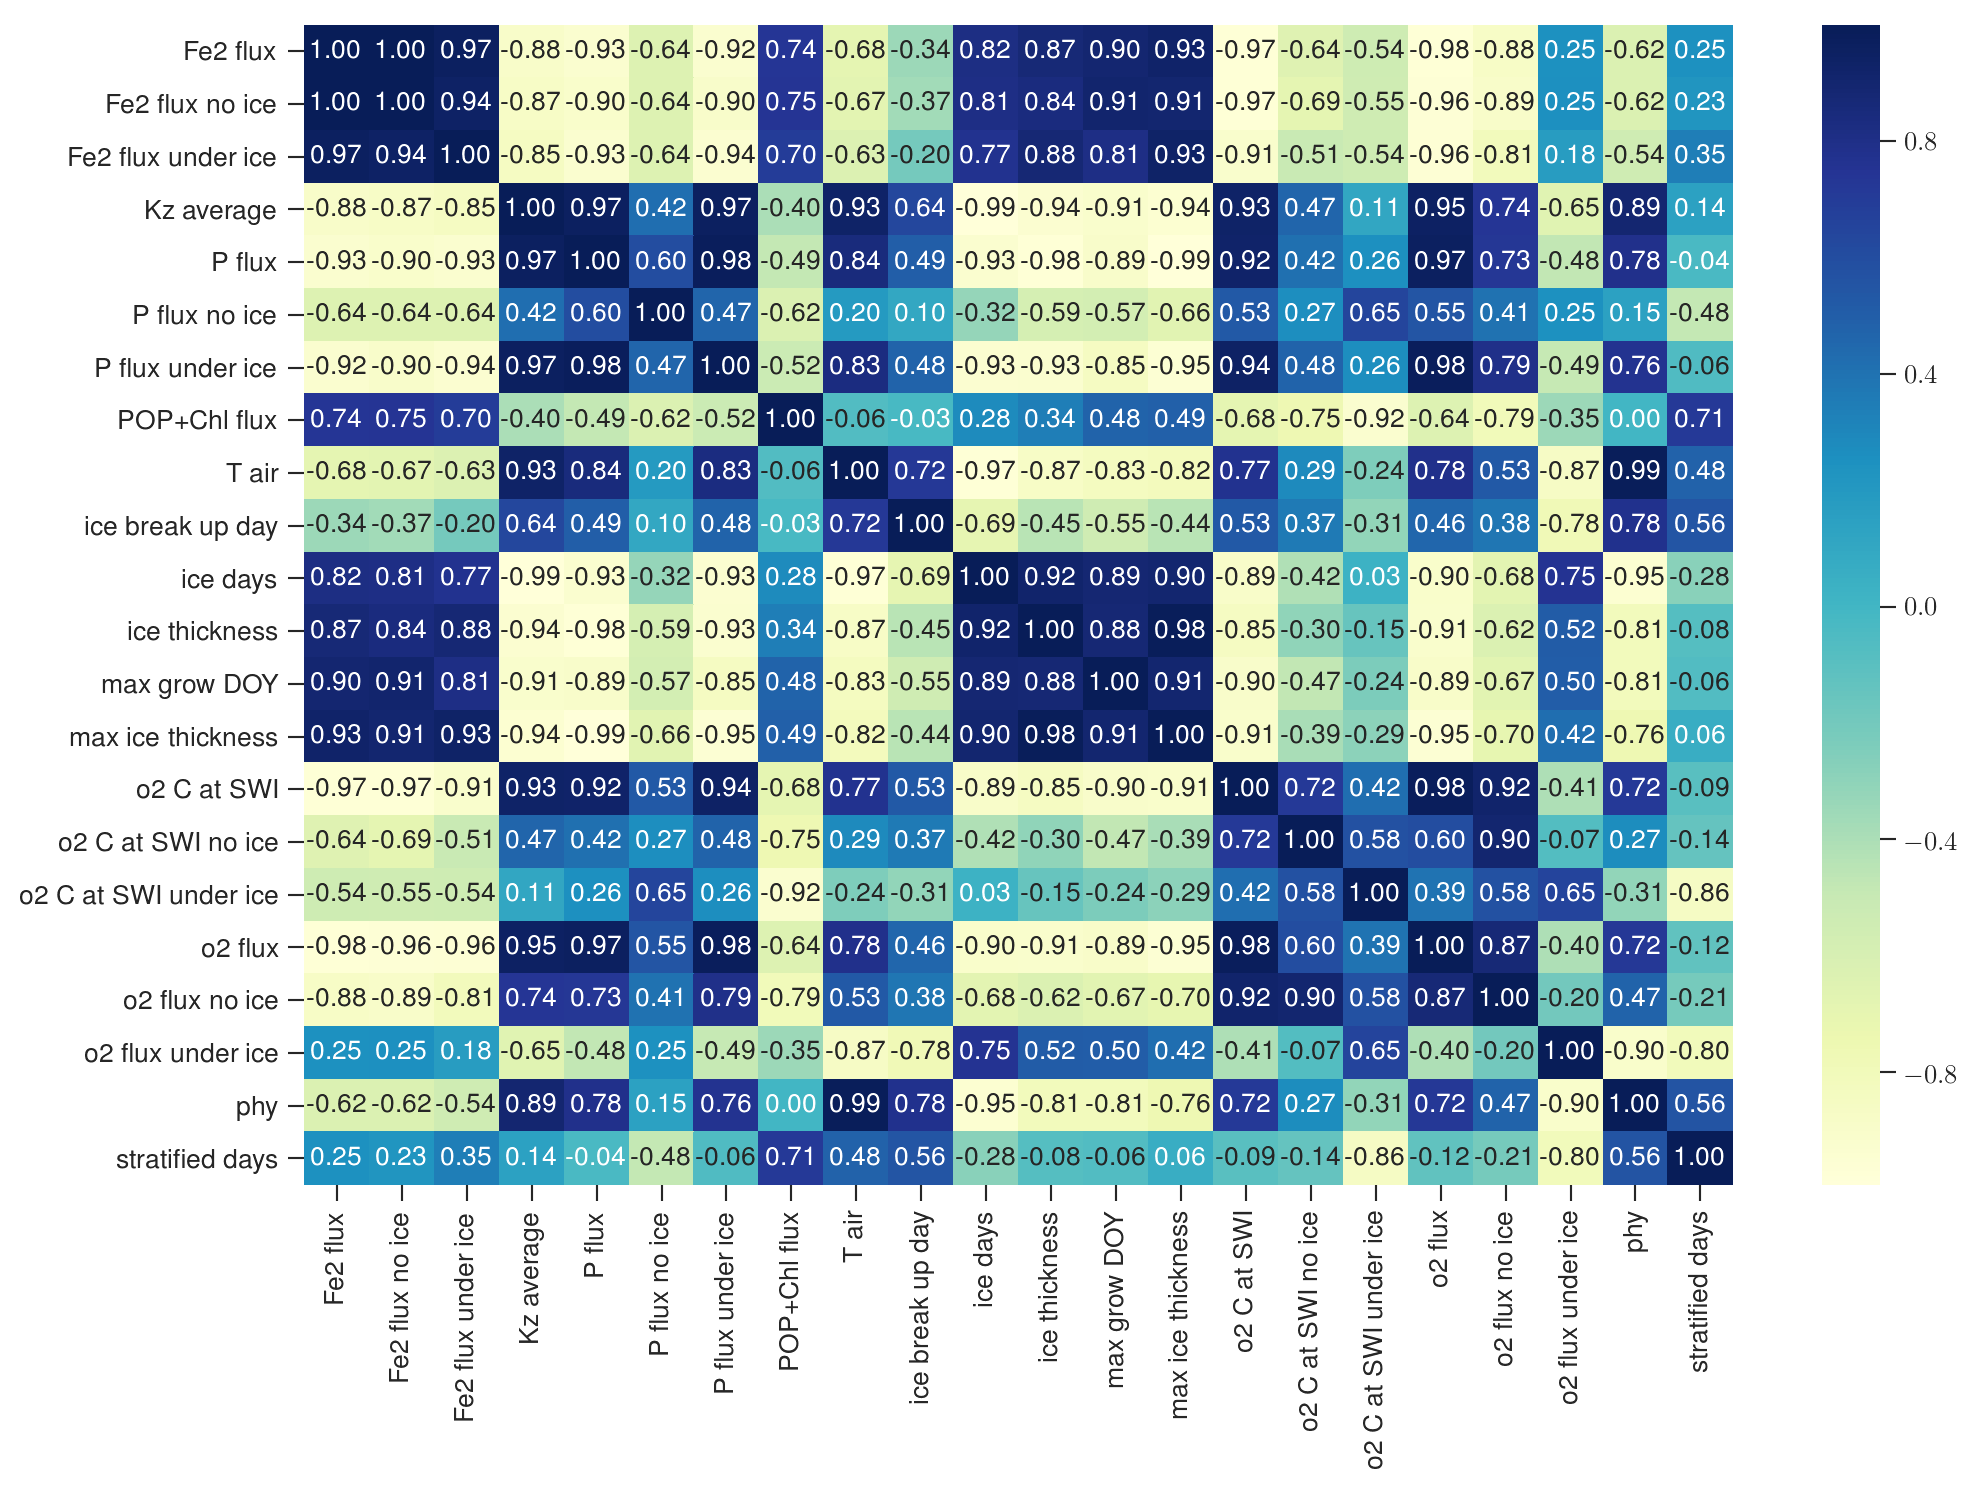

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(lrs.corr(), xticklabels=lrs.corr().columns, yticklabels=lrs.corr().columns, center=0,  annot=True, fmt='.2f', cmap="YlGnBu")

In [34]:
from scipy.stats import linregress
linregress(ice_bool_int_yearly, np.array(phy_int_yearly))

LinregressResult(slope=-0.004919644354080271, intercept=2.748552177635718, rvalue=-0.9457027405155707, pvalue=0.0012812901916166024, stderr=0.0007561731613707226)

Text(0,0.5,'POP flux, umol')

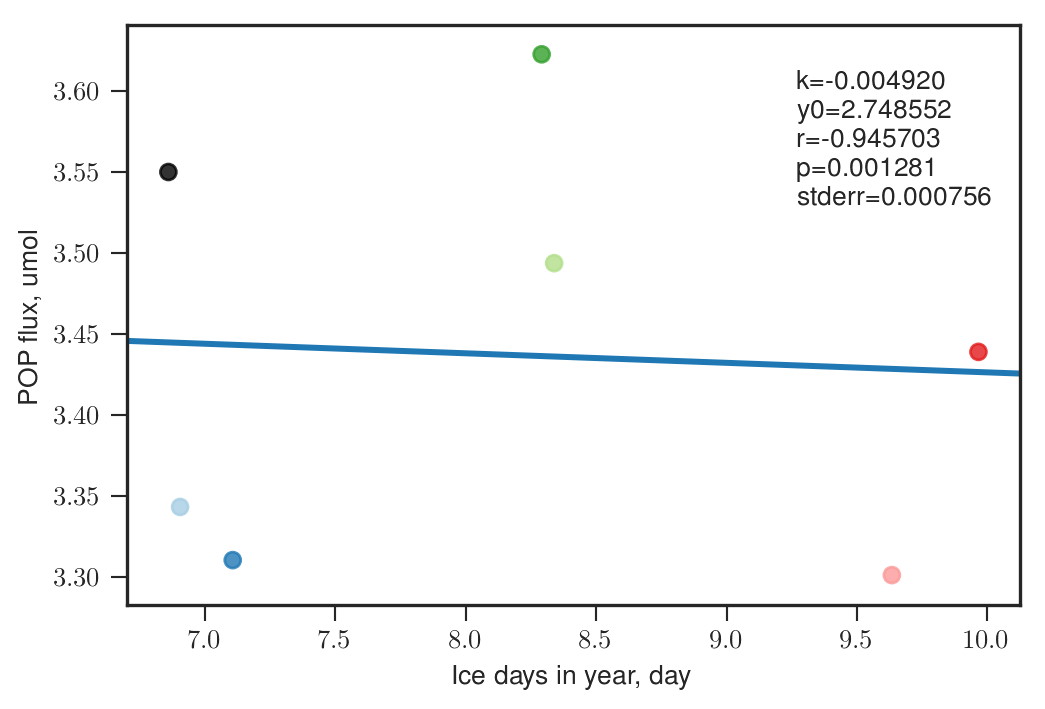

In [35]:
# plt.scatter(ice_bool_int_yearly, np.array(phy_int_yearly))
y,x = -np.array(fx_convert/30000 * POP_fx[names_scen].mean()), np.array(av_T)
ax = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(ice_bool_int_yearly), np.array(phy_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('POP flux, umol')

Text(0.5,0,'Yearly average air temperature, C')

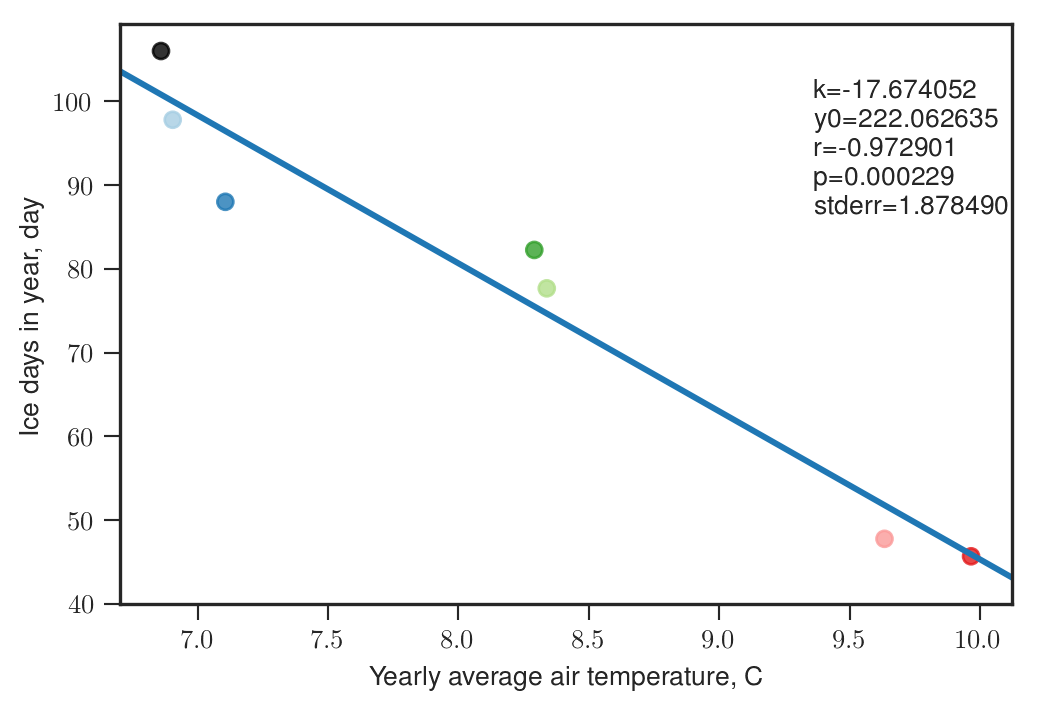

In [36]:
x, y=np.array(av_T), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Ice days in year, day')
plt.xlabel('Yearly average air temperature, C')

Text(0,0.5,'Average P flux from sediment, umol/sq cm/ year')

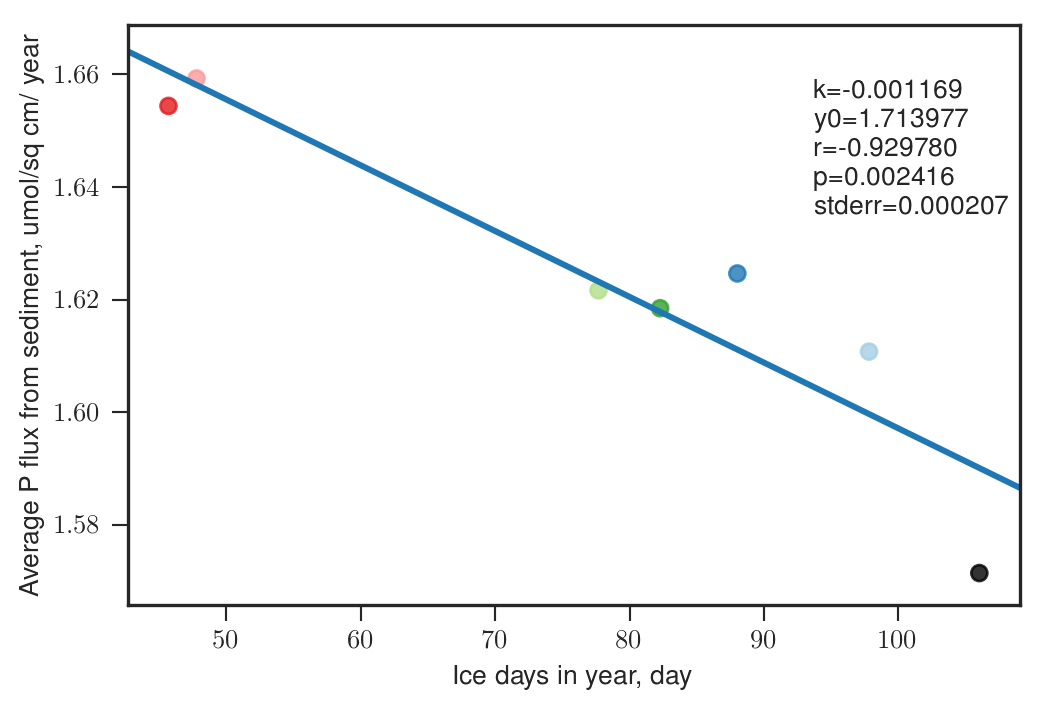

In [37]:
y, x = np.array(p_int_yearly), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Average P flux from sediment, umol/sq cm/ year')


In [38]:
pycno_depth.mean()

IPSL RCP 8.5        12.042928
IPSL RCP 4.5        11.935722
GFDL RCP 8.5        10.972526
GFDL RCP 4.5        11.363134
NorESM RCP 8.5      10.871720
NorESM RCP 4.5       9.844460
Historical           9.993346
Year              2042.499658
Month                6.522930
Day                 15.729637
DOY                183.125257
WOY                 26.590691
dtype: float64

In [39]:
pycno_depth_IceOFF.mean()

IPSL RCP 8.5        13.793639
IPSL RCP 4.5        13.901564
GFDL RCP 8.5        14.459240
GFDL RCP 4.5        14.499501
NorESM RCP 8.5      14.581941
NorESM RCP 4.5      14.390488
Historical          14.341994
Year              2042.499658
Month                6.522930
Day                 15.729637
DOY                183.125257
WOY                 26.590691
dtype: float64

Text(0.5,0,'Air Temperature, C')

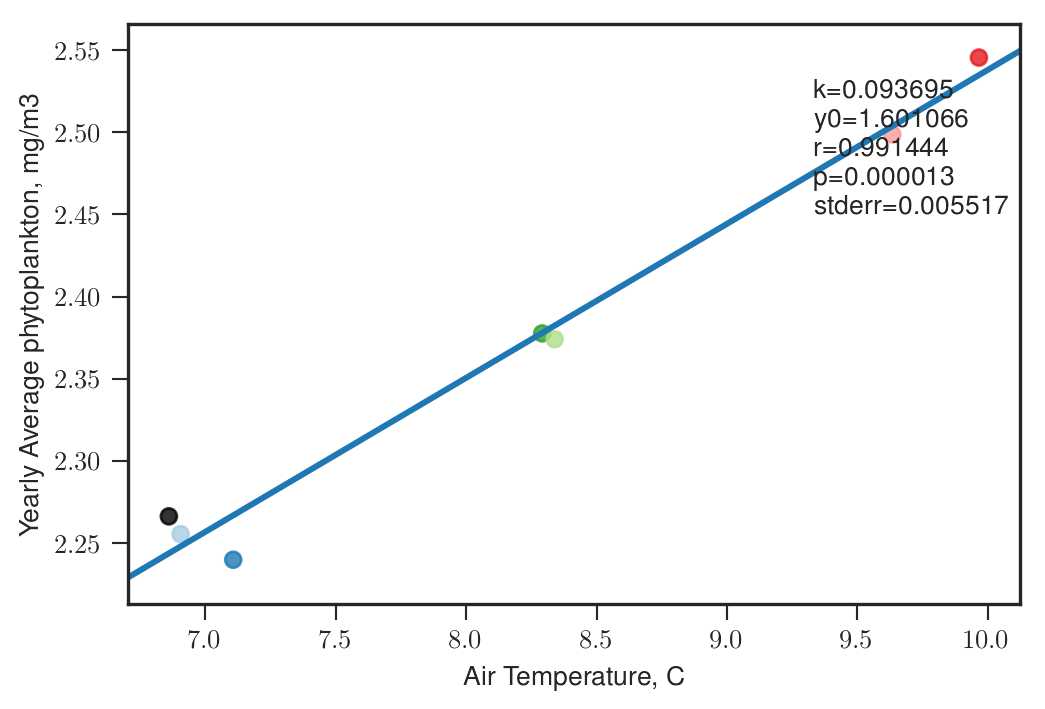

In [40]:
y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Yearly Average phytoplankton, mg/m3')
plt.xlabel('Air Temperature, C')



Text(0.5,0,'DIP flux during no ice periods, [$umol/cm^2/year$]')

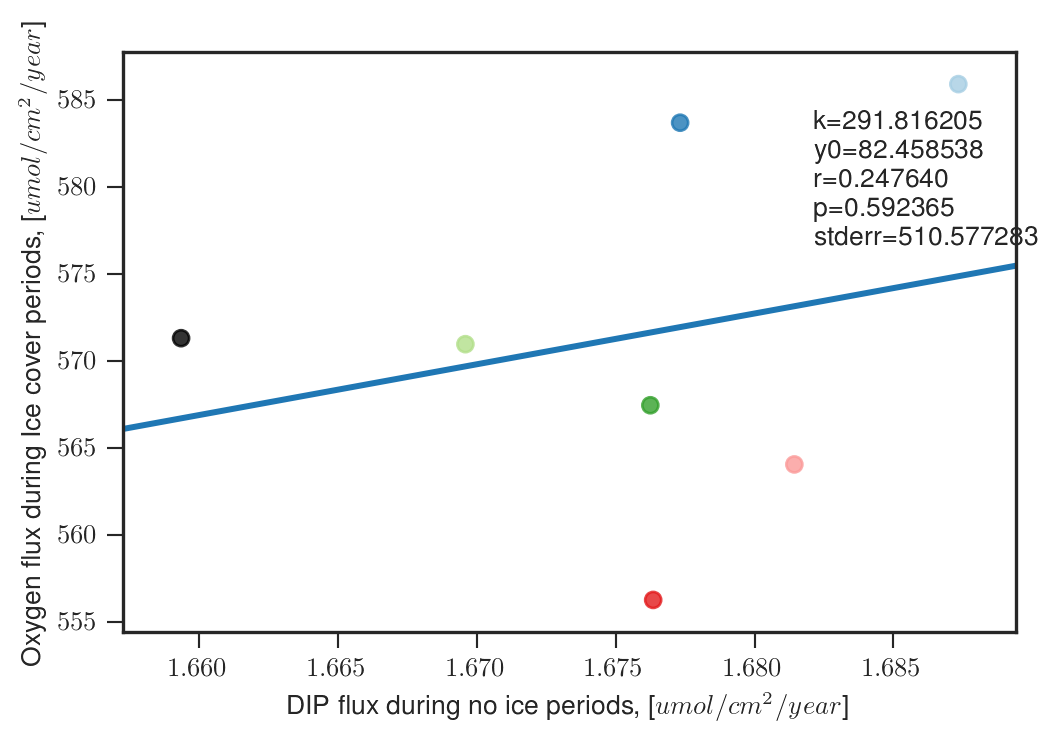

In [41]:
y, x = np.array(o_ui_int_yearly), np.array(pni_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen flux during Ice cover periods, [$umol/cm^2/year$]')
plt.xlabel('DIP flux during no ice periods, [$umol/cm^2/year$]')

Text(0.5,0,'DIP flux, [$umol/cm^2/year$]')

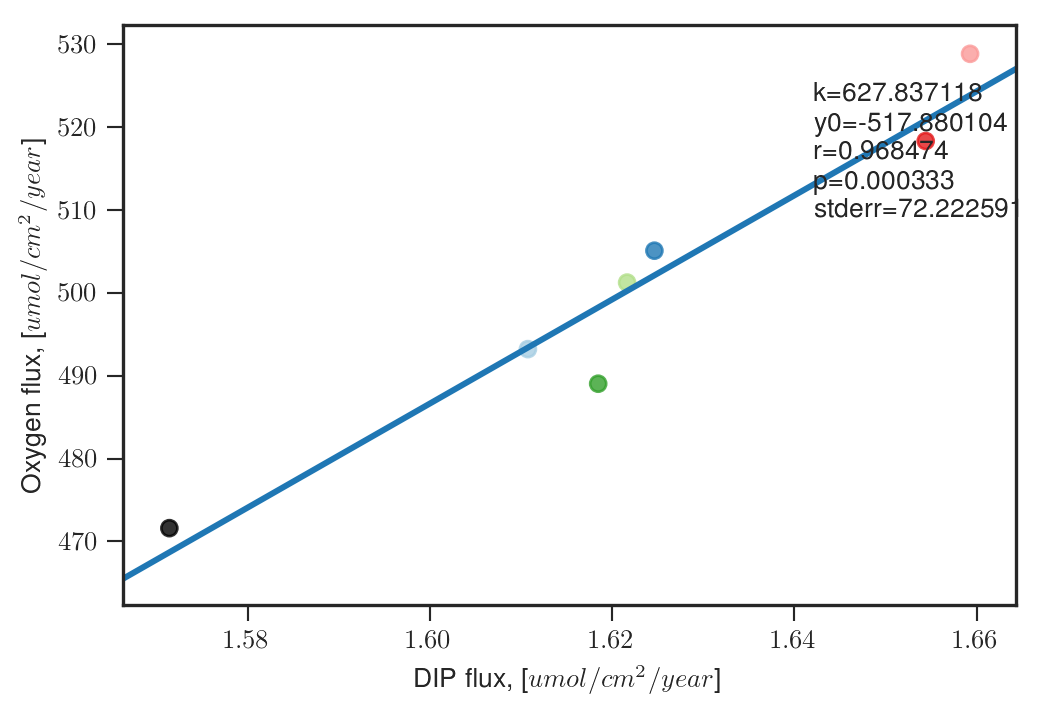

In [42]:
y, x = np.array(o_int_yearly), np.array(p_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen flux, [$umol/cm^2/year$]')
plt.xlabel('DIP flux, [$umol/cm^2/year$]')

Text(0.5,0,'Kz')

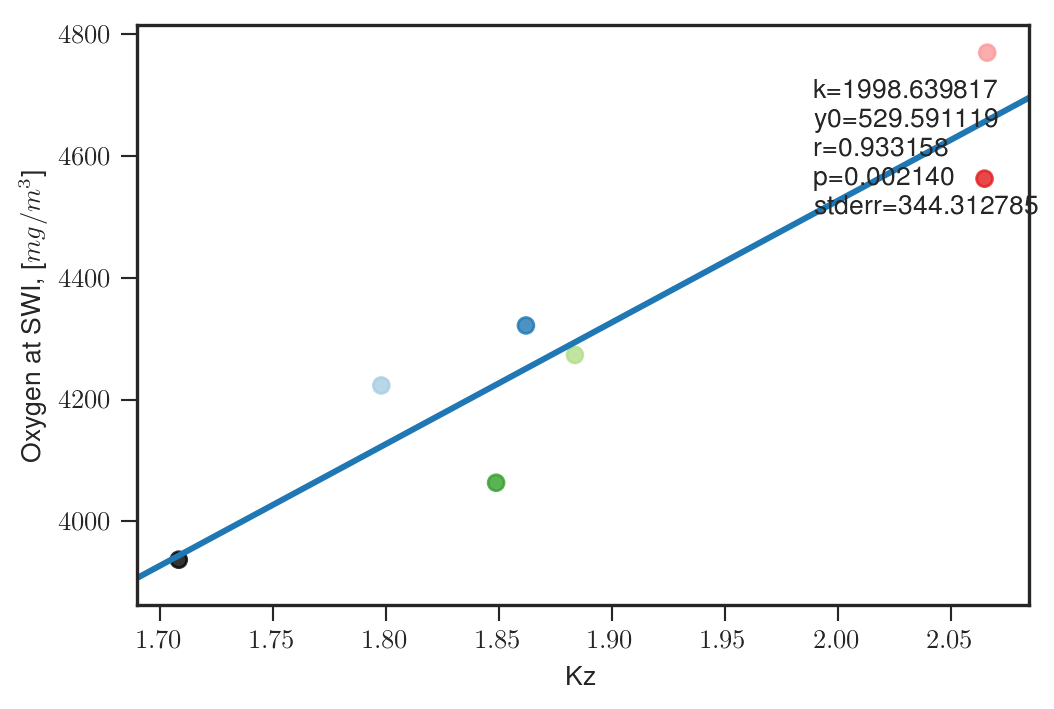

In [43]:
y, x = np.array(oxy_int_yearly), np.array(Kz_av)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen at SWI, [$mg/m^3$]')
plt.xlabel('Kz')

In [44]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

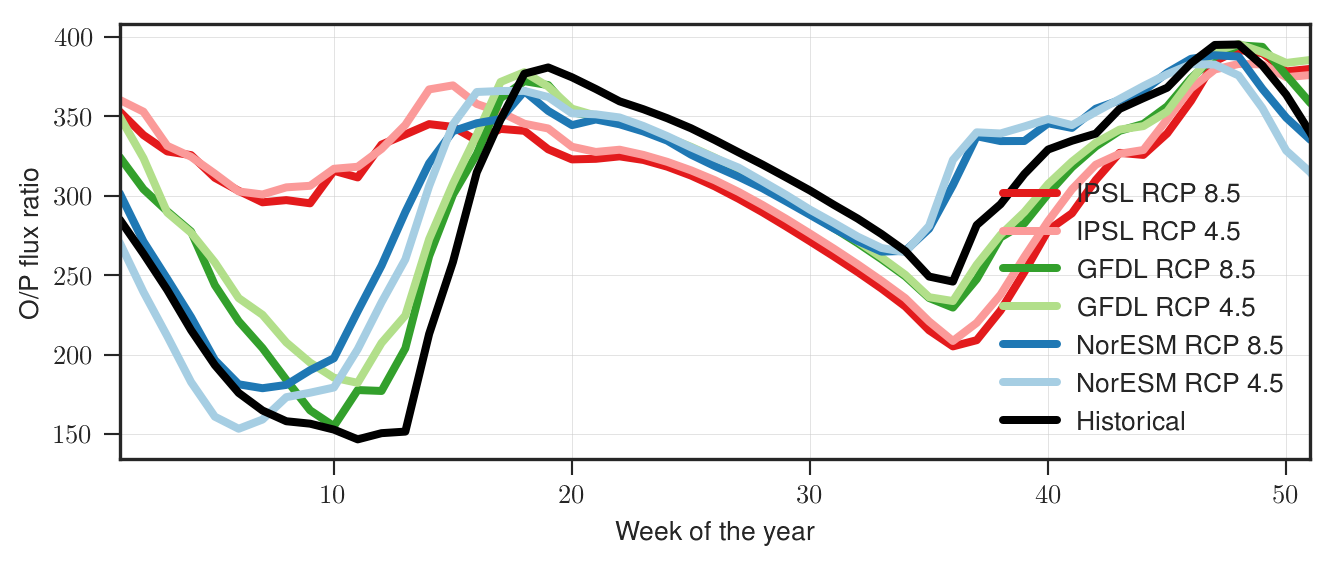

In [45]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
(O2_fx.groupby(['WOY']).mean()[names_scen]/P_fx.groupby(['WOY']).mean()[names_scen]).plot(linestyle='-', lw=3, ax=ax2, color=sns.color_palette("Paired", 6)[::-1] + [(0,0,0)])
ax2.set_ylabel('O/P flux ratio')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax2.grid(linestyle='-', linewidth=0.2)





Text(0.5,0,'Oxygen at SWI, [$mg/m^3$]')

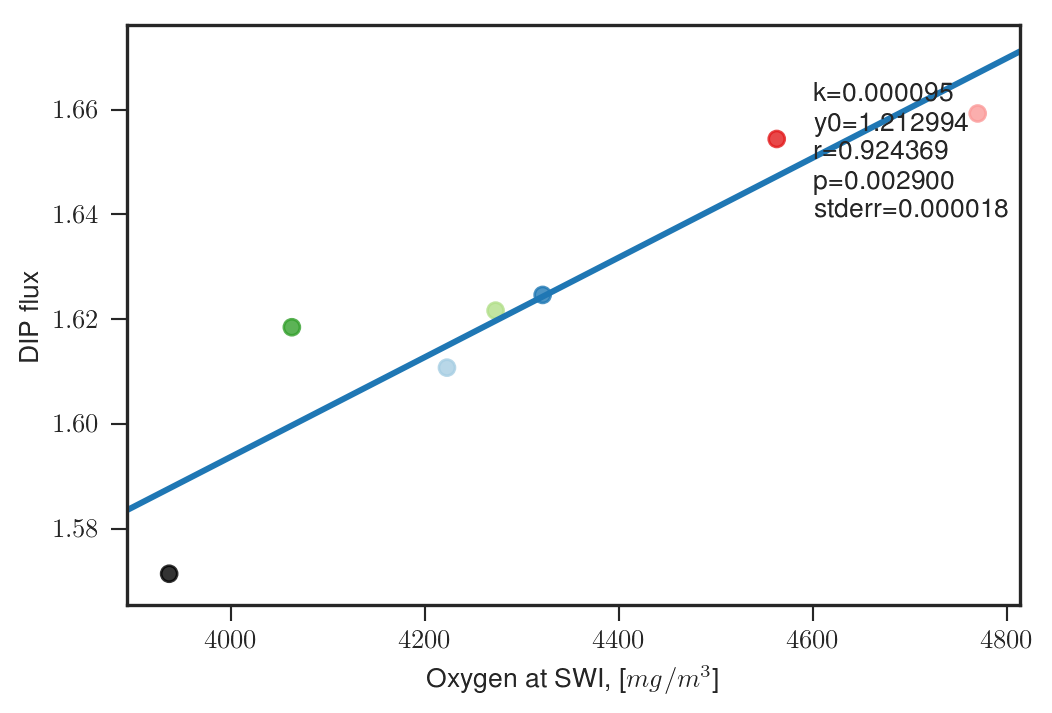

In [46]:
y, x = np.array(p_int_yearly), np.array(oxy_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)

plt.ylabel('DIP flux')
plt.xlabel('Oxygen at SWI, [$mg/m^3$]')


Text(0.5,0,'Oxygen no ice at SWI, [$mg/m^3$]')

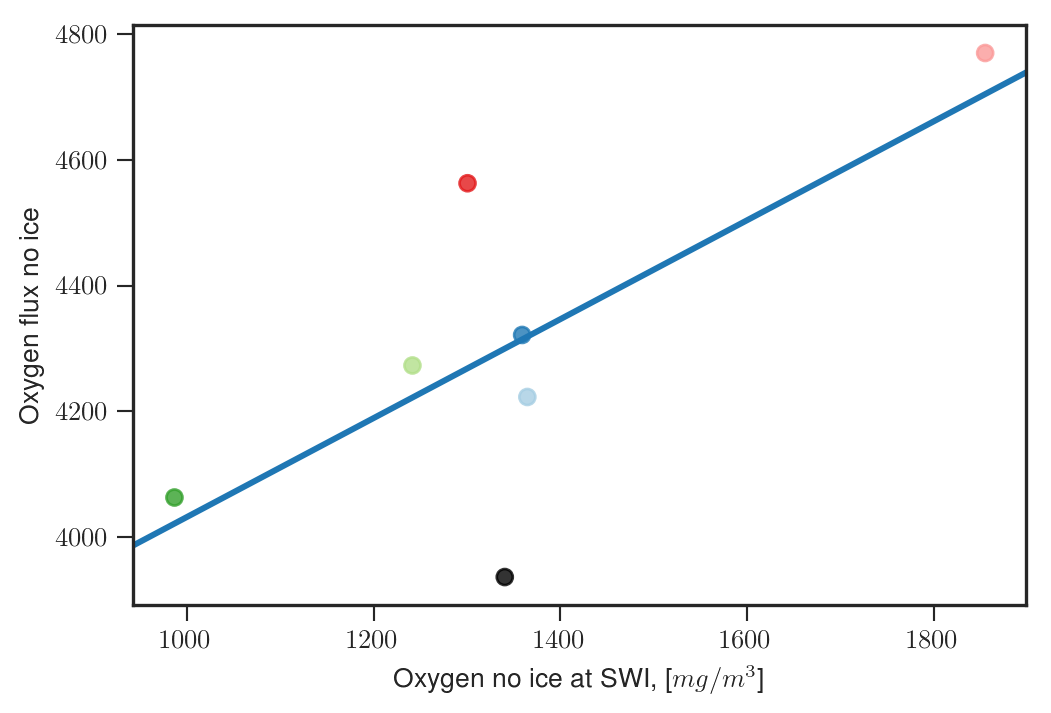

In [47]:
y, x = np.array(oxy_int_yearly), np.array(oxy_ni_int_yearly)
ax = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
# for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
#     plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)

plt.ylabel('Oxygen flux no ice')
plt.xlabel('Oxygen no ice at SWI, [$mg/m^3$]')

In [48]:
# _, ax1 = plt.subplots()
# y1, x1=np.array(oxy_int_yearly), np.array(p_int_yearly)
# y2, x2 = np.array(oxy_int_yearly_IceOFF), np.array(p_int_yearly_IceOFF)
# y3, x3 = np.array(oxy_int_yearly_Q10OFF), np.array(p_int_yearly_Q10OFF)

# ax1.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
# ax1.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
# ax1.scatter(x3,y3, c=clr_pltt, s=40, marker='s')


# ax1 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':clr_pltt, 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
# ax1 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax1)
# ax1 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax1)

# ax1.relim()      # make sure all the data fits
# ax1.autoscale()
# ax1.set_ylabel('O2 at SWI')
# ax1.set_xlabel('Temperature, C')

In [49]:
# _, ax1 = plt.subplots()
# x1, y1=np.array(av_T), -np.array(POP_fx[names_scen].mean())
# x2, y2 = np.array(av_T_IceOFF), -np.array(POP_fx_IceOFF[names_scen].mean())
# x3, y3 = np.array(av_T_Q10OFF), -np.array(POP_fx_Q10OFF[names_scen].mean())

# ax1.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
# ax1.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
# ax1.scatter(x3,y3, c=clr_pltt, s=40, marker='s')


# ax1 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':clr_pltt, 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
# ax1 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax1)
# ax1 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax1)

# ax1.relim()      # make sure all the data fits

# ax1.set_xlabel('Temperature, C')
# ax1.set_ylabel('POP flux')

In [50]:
names_scen[1]

'IPSL RCP 4.5'

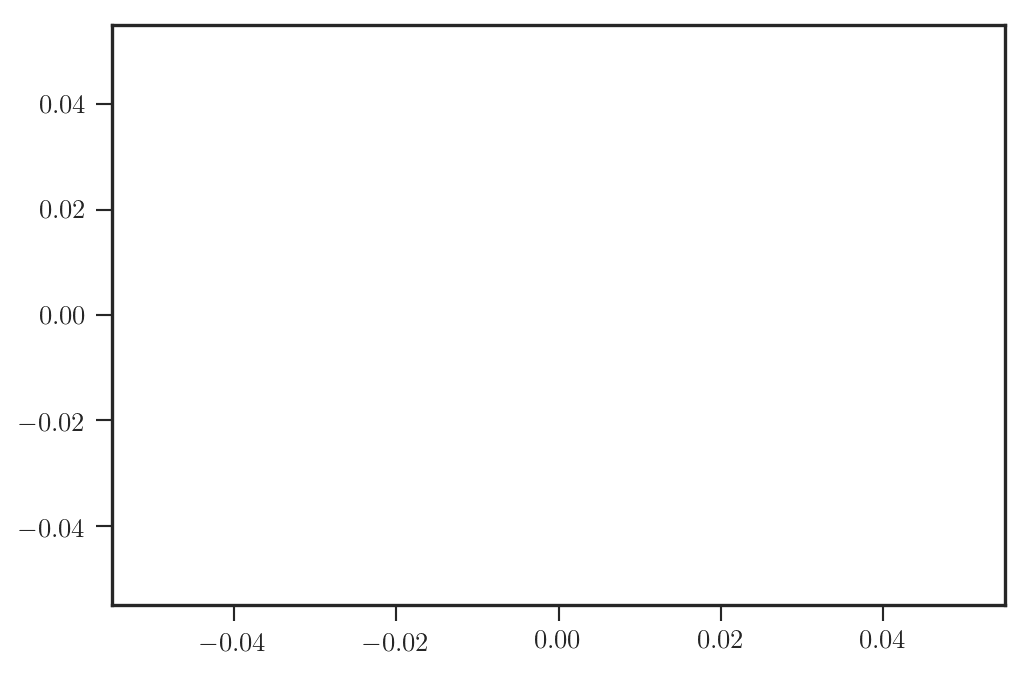

In [51]:
lp = lambda i: plt.plot([],color=clr_pltt[i], ms=np.sqrt(64), mec="none",
                        label=names_scen[i], ls="", marker="o")[0]
handles = [lp(i) for i in range(7)]
# plt.legend(handles=handles)

NameError: name 'days_of_bloom_1mg_Q10OFF' is not defined

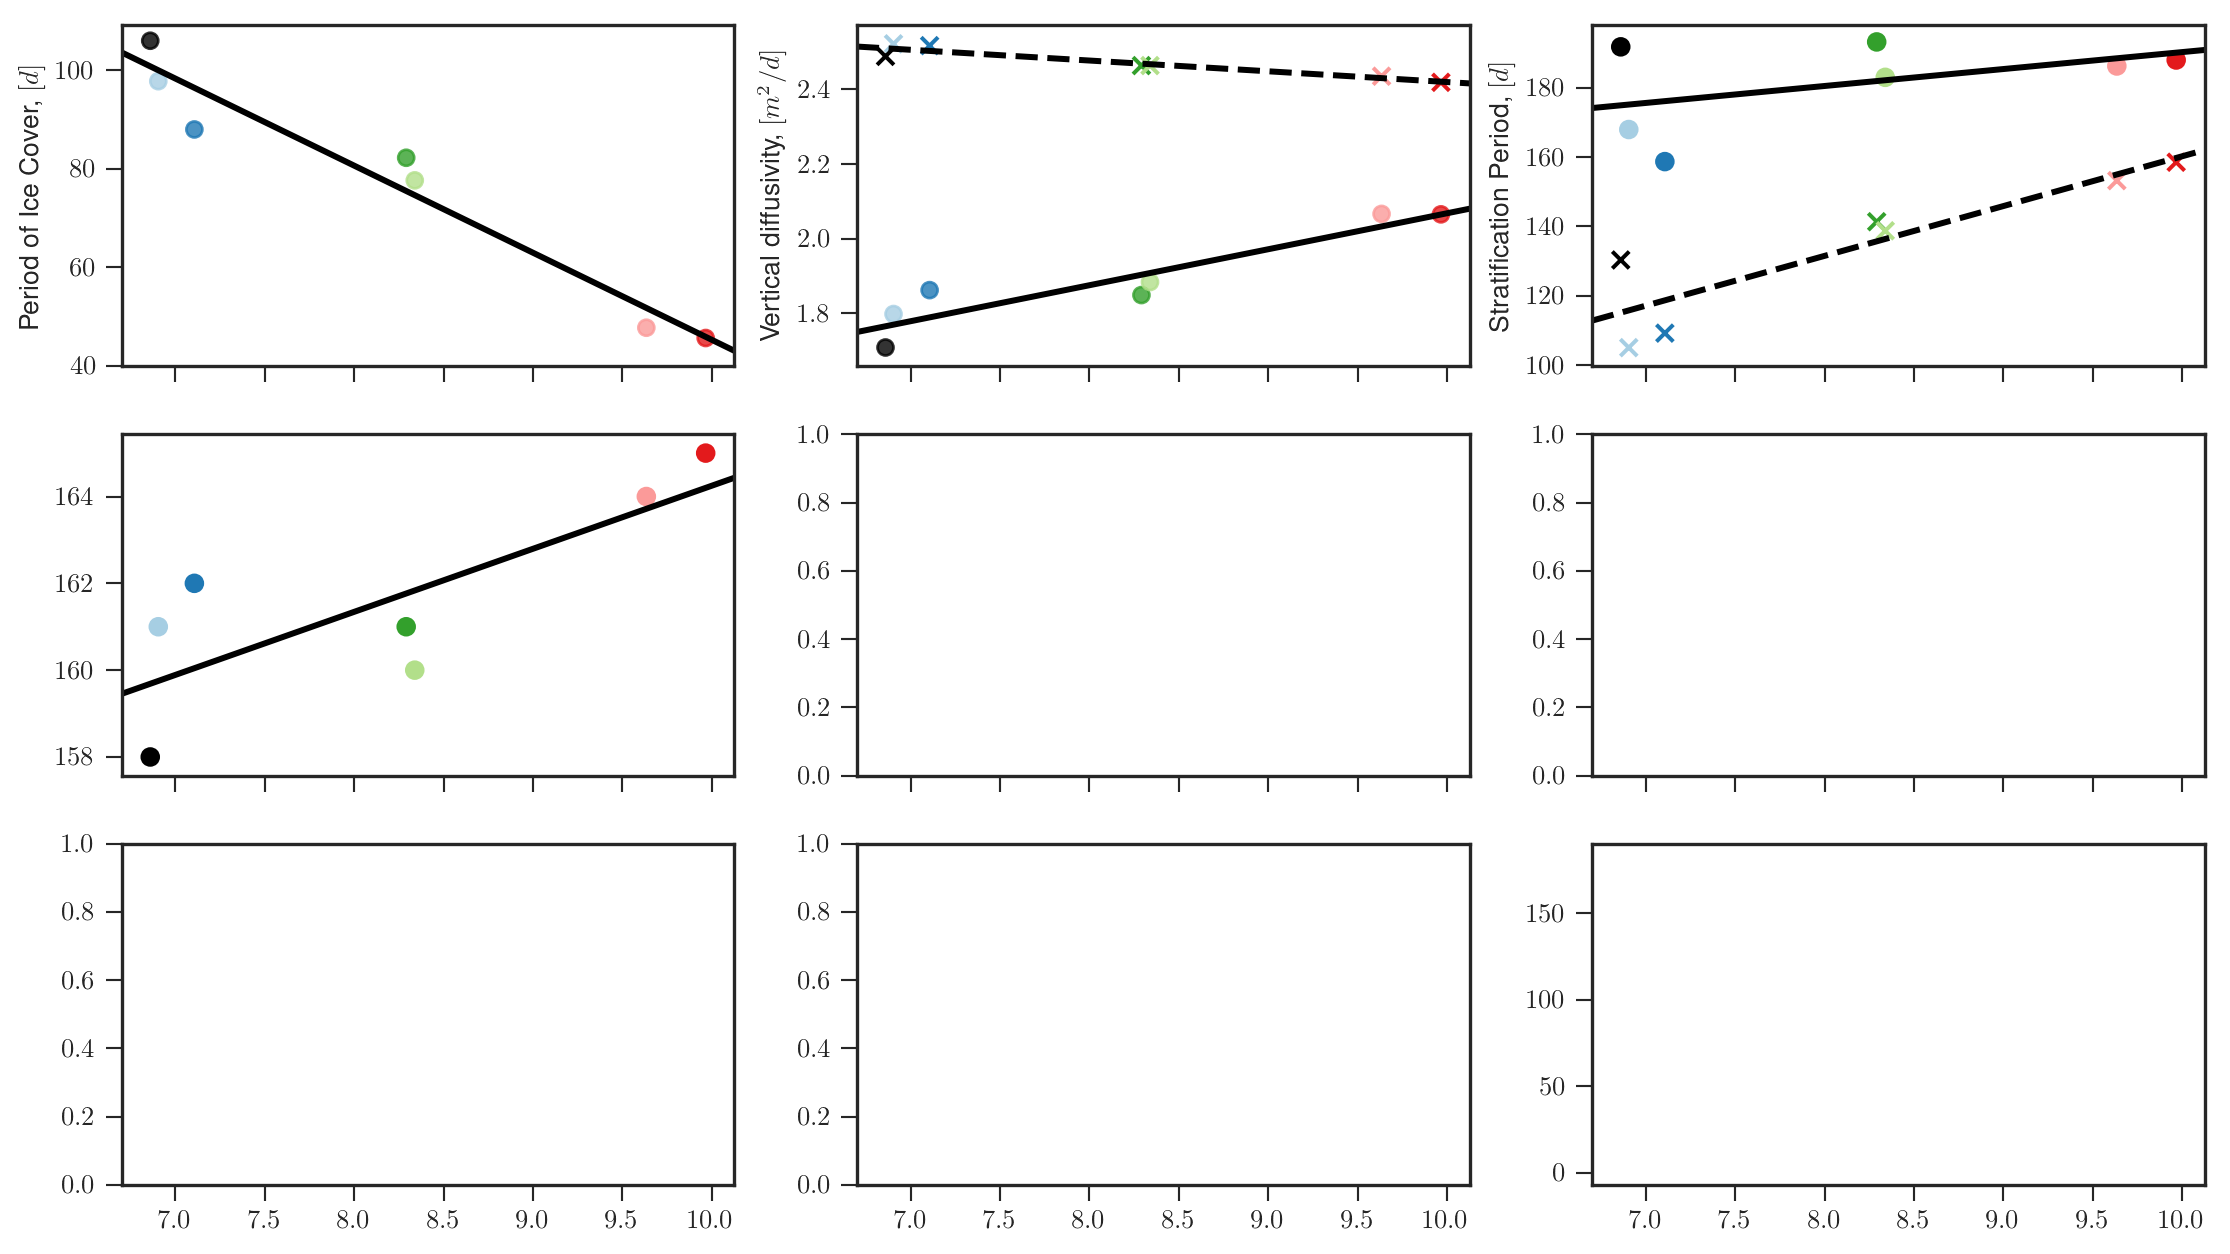

In [52]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(14,8), sharex=True, sharey=False)


x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt, }, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
ax1.set_ylabel('Period of Ice Cover, $[d]$')


x, y=np.array(av_T), np.array(Kz_av)
ax2=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax2)

y, x = np.array(Kz_av_IceOFF), np.array(av_T_IceOFF)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax2)
ax2.scatter(x,y, c=clr_pltt, s=40, marker='x')
ax2.set_ylabel('Vertical diffusivity, $[m^2/d]$')



y, x=np.array(pycno_depth[names_scen].count()/(2070-2015)), np.array(av_T)
ax3=sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(pycno_depth_IceOFF[names_scen].count()/(2070-2015)), np.array(av_T_IceOFF)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='x')

ax3.set_ylabel('Stratification Period, $[d]$')



y, x = np.array(days_of_bloom_1mg), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(days_of_bloom_1mg_Q10OFF), np.array(av_T_Q10OFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(days_of_bloom_1mg_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(days_of_bloom_1mg_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
# ax2.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax4.set_ylabel(r'Productive Period, $[d]$')
# ax4.set_xlabel('Air Temperature, C')



y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(phy_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(phy_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(phy_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
# ax3.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax5.set_ylabel('Surface Phy-P (0-4m), $[ug/L]$')
# ax5.set_xlabel('Air Temperature, C')



y, x = np.array(max_grow_DOY), np.array(av_T)

sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(max_grow_DOY_Q10OFF), np.array(av_T_Q10OFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(max_grow_DOY_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(max_grow_DOY_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='^')

# ax4.set_xlabel('Air Temperature, C')
ax6.set_ylabel('Day of maximum growth rate, $[DOY]$')

x1, y1=np.array(av_T), -np.array(POP_fx[names_scen].mean())
x2, y2 = np.array(av_T_IceOFF), -np.array(POP_fx_IceOFF[names_scen].mean())
x3, y3 = np.array(av_T_Q10OFF), -np.array(POP_fx_Q10OFF[names_scen].mean())
ax7.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
ax7.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
ax7.scatter(x3,y3, c=clr_pltt, s=40, marker='s')
ax7 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax7)
ax7 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax7)
ax7 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax7)

ax7.set_xlabel('Air Temperature, $[C]$')
ax7.set_ylabel('POP flux at SWI, $[umol/cm^2/y]$')



y, x = fx_convert/32000*np.array(o_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

y, x = fx_convert/32000*np.array(o_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax8.set_ylabel('Oxygen flux at SWI, $[umol/cm^2/y]$')
ax8.set_xlabel('Air Temperature, $[C]$')



y, x = fx_convert/30000*np.array(p_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax9)
s1 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

y, x = fx_convert/30000*np.array(p_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax9)
s2 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/30000*np.array(p_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax9)
s3 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# y, x = np.array(o_int_yearly_IceOFF_Q10OFF)/np.array(p_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax9.set_ylabel('DIP flux at SWI, $[umol/cm^2/y]$')
ax9.set_xlabel('Air Temperature, $[C]$')


# l1 = ax1.legend(handles=handles, loc=1, fontsize='x-small', frameon=0)

l1 = plt.legend(ax4.lines, ['Model', 'Q10 off', 'Ice off'],loc=(-2.35, 2.45), title='Regression lines:', frameon=1)
plt.gca().add_artist(l1)
# ax9.legend()


l2 = plt.legend(handles=handles, loc=(-1.75, 2.74), frameon=1, title='Scenario:', fontsize='x-small')
plt.gca().add_artist(l2)

l3 = plt.legend([s1,s2,s3], ['Model', 'Q10 off', 'Ice off'],loc=(0.65, 0.05), title='On / Off:', frameon=1)
# plt.gca().add_artist(l1)


# ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for ax in [ax1, ax2,ax3, ax4,ax5, ax6, ax7,ax8, ax9]:
    ax.relim(visible_only=True)      # make sure all the data fits
    ax.autoscale()


ax1.set_ylim(40, 110)
ax2.set_ylim(1.6, 2.6)
ax3.set_ylim(100, 200)
ax4.set_ylim(150, 190)
# ax5.set_ylim(160, 210)
ax6.set_ylim(160, 210)
ax7.set_ylim(3.5, 4.6)
ax8.set_ylim(200, 350)
# ax9.set_ylim(3.5, 4.6)


# plt.subplots_adjust(right=0.8, wspace=0.3, hspace=0.1)

# plt.tight_layout()

# savefig('cc/T/T_vs_Ice_vs_Q10_2')

# ax9.set_ylim(0.85, 1.1)
# ax7.set_ylim(1.25, 1.7)

In [ ]:
names_scen

In [ ]:
av_T

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(14,8), sharex=True, sharey=False)


x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt, }, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
ax1.set_ylabel('Period of Ice Cover, $[d]$')


x, y=np.array(av_T), np.array(Kz_av)
ax2=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax2)

y, x = np.array(Kz_av_IceOFF), np.array(av_T_IceOFF)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax2)
ax2.scatter(x,y, c=clr_pltt, s=40, marker='x')
ax2.set_ylabel('Vertical diffusivity, $[m^2/d]$')



y, x=np.array(pycno_depth[names_scen].count()/(2070-2015)), np.array(av_T)
ax3=sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(pycno_depth_IceOFF[names_scen].count()/(2070-2015)), np.array(av_T_IceOFF)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='x')

ax3.set_ylabel('Stratification Period, $[d]$')



y, x = fx_convert/56000*np.array(fe_int_yearly), np.array(av_T)
s1 =sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(days_of_bloom_1mg_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = fx_convert/56000*np.array(fe_int_yearly_IceOFF), np.array(av_T_IceOFF)
s2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(fe_int_yearly_1mg_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
# ax2.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax4.set_ylabel(r'Fe(II) flux from SWI, $[umol/cm^2/y]$')
# ax4.set_xlabel('Air Temperature, C')



y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(phy_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(phy_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(phy_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
# ax3.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax5.set_ylabel('Surface Phy-P (0-4m), $[ug/L]$')
# ax5.set_xlabel('Air Temperature, C')



y, x = np.array(pycno_depth.mean()[names_scen]), np.array(av_T)

sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(pycno_depth_Q10OFF.mean()[names_scen]), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(pycno_depth_IceOFF.mean()[names_scen]), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(max_grow_DOY_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='^')

# ax4.set_xlabel('Air Temperature, C')
ax6.set_ylabel('Pycnocline Depth, $[m]$')

x1, y1=np.array(av_T), -np.array(POP_fx[names_scen].mean())
x2, y2 = np.array(av_T_IceOFF), -np.array(POP_fx_IceOFF[names_scen].mean())
# # x3, y3 = np.array(av_T_Q10OFF), -np.array(POP_fx_Q10OFF[names_scen].mean())
ax7.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
ax7.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
# ax7.scatter(x3,y3, c=clr_pltt, s=40, marker='s')
ax7 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax7)
ax7 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax7)
# ax7 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax7)

ax7.set_xlabel('Air Temperature, $[C]$')
ax7.set_ylabel('POP flux to SWI, $[umol/cm^2/y]$')



y, x = fx_convert/32000*np.array(o_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

# # y, x = fx_convert/32000*np.array(o_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax8)
# ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# # y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax8.set_ylabel('Oxygen flux to SWI, $[umol/cm^2/y]$')
ax8.set_xlabel('Air Temperature, $[C]$')



y, x = fx_convert/30000*np.array(p_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax9)
s1 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

# # y, x = fx_convert/30000*np.array(p_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax9)
# s2 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/30000*np.array(p_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax9)
s3 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# # # y, x = np.array(o_int_yearly_IceOFF_Q10OFF)/np.array(p_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax9.set_ylabel('DIP flux from SWI, $[umol/cm^2/y]$')
ax9.set_xlabel('Air Temperature, $[C]$')


# l1 = ax1.legend(handles=handles, loc=1, fontsize='x-small', frameon=0)

l1 = plt.legend(ax4.lines, ['Model', 'Ice cover off'],loc=(-2.35, 2.45), title='Regression lines:', frameon=1)
plt.gca().add_artist(l1)
# ax9.legend()


l2 = plt.legend(handles=handles, loc=(-1.75, 2.74), frameon=1, title='Scenario:', fontsize='x-small')
plt.gca().add_artist(l2)

l3 = plt.legend([s1,s3,s2], ['Model', 'Ice cover off'],loc=(0.55, 0.35), title='On / Off:', frameon=1)
# plt.gca().add_artist(l1)


# ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for ax in [ax1, ax2,ax3, ax4,ax5, ax6, ax7,ax8, ax9]:
    ax.relim(visible_only=True)      # make sure all the data fits
    ax.autoscale()
    ax.grid(alpha=0.5)


ax1.set_ylim(40, 110)
ax2.set_ylim(1.6, 2.6)
ax3.set_ylim(100, 200)
ax4.set_ylim(10, 15)
ax5.set_ylim(1.8, 2.6)
ax6.set_ylim(9, 15)
ax7.set_ylim(2.2, 3.0)
ax8.set_ylim(500, 700)
ax9.set_ylim(1.9, 2.25)


# plt.subplots_adjust(right=0.8, wspace=0.3, hspace=0.1)

# plt.tight_layout()

# savefig('cc/T/T_vs_Ice_vs_Q10_5')

# ax9.set_ylim(0.85, 1.1)
# ax7.set_ylim(1.25, 1.7)

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(14,8), sharex=True, sharey=False)


x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt, }, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
ax1.set_ylabel('Period of Ice Cover, $[d]$')


x, y=np.array(av_T), np.array(Kz_av)
ax2=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax2)

y, x = np.array(Kz_av_IceOFF), np.array(av_T_IceOFF)
# ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax2)
# ax2.scatter(x,y, c=clr_pltt, s=40, marker='x')
ax2.set_ylabel('Vertical diffusivity, $[m^2/d]$')



y, x=np.array(pycno_depth[names_scen].count()/(2070-2015)), np.array(av_T)
ax3=sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(pycno_depth_IceOFF[names_scen].count()/(2070-2015)), np.array(av_T_IceOFF)
# ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax3)
# ax3.scatter(x,y, c=clr_pltt, s=40, marker='x')

ax3.set_ylabel('Stratification Period, $[d]$')



y, x = fx_convert/56000*np.array(fe_int_yearly), np.array(av_T)
s1 =sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(days_of_bloom_1mg_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = fx_convert/56000*np.array(fe_int_yearly_IceOFF), np.array(av_T_IceOFF)
# s2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(fe_int_yearly_1mg_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
# ax2.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax4.set_ylabel(r'Fe(II) flux from SWI, $[umol/cm^2/y]$')
# ax4.set_xlabel('Air Temperature, C')



y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(phy_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(phy_int_yearly_IceOFF), np.array(av_T_IceOFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(phy_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
# ax3.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax5.set_ylabel('Surface Phy-P (0-4m), $[ug/L]$')
# ax5.set_xlabel('Air Temperature, C')



y, x = np.array(pycno_depth.mean()[names_scen]), np.array(av_T)

sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(pycno_depth_Q10OFF.mean()[names_scen]), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(pycno_depth_IceOFF.mean()[names_scen]), np.array(av_T_IceOFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(max_grow_DOY_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='^')

# ax4.set_xlabel('Air Temperature, C')
ax6.set_ylabel('Pycnocline Depth, $[m]$')

x1, y1=np.array(av_T), -np.array(POP_fx[names_scen].mean())
x2, y2 = np.array(av_T_IceOFF), -np.array(POP_fx_IceOFF[names_scen].mean())
# # x3, y3 = np.array(, 'marker':Noneav_T_Q10OFF), -np.array(POP_fx_Q10OFF[names_scen].mean())
ax7.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
# ax7.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
# ax7.scatter(x3,y3, c=clr_pltt, s=40, marker='s')
ax7 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax7)
# ax7 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax7)
# ax7 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax7)

ax7.set_xlabel('Air Temperature, $[C]$')
ax7.set_ylabel('POP flux to SWI, $[umol/cm^2/y]$')



y, x = fx_convert/32000*np.array(o_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

# # y, x = fx_convert/32000*np.array(o_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax8)
# ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF), np.array(av_T_IceOFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax8)
# ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# # y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax8.set_ylabel('Oxygen flux to SWI, $[umol/cm^2/y]$')
ax8.set_xlabel('Air Temperature, $[C]$')



y, x = fx_convert/30000*np.array(p_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax9)
s1 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

# # y, x = fx_convert/30000*np.array(p_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax9)
# s2 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/30000*np.array(p_int_yearly_IceOFF), np.array(av_T_IceOFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white', 'marker':None}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax9)
# s3 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# # # y, x = np.array(o_int_yearly_IceOFF_Q10OFF)/np.array(p_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax9.set_ylabel('DIP flux from SWI, $[umol/cm^2/y]$')
ax9.set_xlabel('Air Temperature, $[C]$')


# l1 = ax1.legend(handles=handles, loc=1, fontsize='x-small', frameon=0)

# l1 = plt.legend(ax4.lines, ['Model', 'Ice cover off'],loc=(-2.35, 2.45), title='Regression lines:', frameon=1)
# plt.gca().add_artist(l1)
# ax9.legend()


l2 = plt.legend(handles=handles, loc=(-1.75, 2.74), frameon=1, title='Scenario:', fontsize='x-small')
plt.gca().add_artist(l2)

# l3 = plt.legend([s1,s3,s2], ['Model', 'Ice cover off'],loc=(0.55, 0.35), title='On / Off:', frameon=1)
# plt.gca().add_artist(l1)


# ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for ax in [ax1, ax2,ax3, ax4,ax5, ax6, ax7,ax8, ax9]:
    ax.relim(visible_only=True)      # make sure all the data fits
    ax.autoscale()
    ax.grid(alpha=0.5)


ax1.set_ylim(40, 110)
ax2.set_ylim(1.6, 2.6)
ax3.set_ylim(100, 200)
ax4.set_ylim(10, 15)
ax5.set_ylim(1.8, 2.6)
ax6.set_ylim(9, 15)
ax7.set_ylim(2.2, 3.0)
ax8.set_ylim(500, 700)
ax9.set_ylim(1.9, 2.25)


# plt.subplots_adjust(right=0.8, wspace=0.3, hspace=0.1)

# plt.tight_layout()

# savefig('cc/T/T_vs_Ice_vs_Q10_5')

# ax9.set_ylim(0.85, 1.1)
# ax7.set_ylim(1.25, 1.7)

In [ ]:
IPSL

In [ ]:
y, x = np.array(max_grow_DOY), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('max grow DOY')

In [ ]:
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values

In [ ]:
y, x = np.array(phy_may_sept_mean), np.array(ice_break_up)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Max ice thickness, m')
plt.ylabel('Day of blooms')

In [ ]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('max ice h')
plt.ylabel('Day of blooms')

In [ ]:
pd.to_datetime('2000160', format='%Y%j')

In [ ]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Date of the maximum rate of grow')
# plt.ylim(2,2.3)

In [ ]:
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [ ]:
y, x = np.array(phy_may_sept_mean), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('phy may sept mean')
# plt.ylim(2,2.3)

In [ ]:
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values

In [ ]:
y, x = np.array(days_of_bloom_1mg), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Maxmimum Ice thickness')
plt.ylabel('Phy more than 1 mg/m3, days')
# plt.ylim(2,2.3)

In [ ]:
y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Period with ice cover, days')
# plt.ylim(2,2.3)

In [ ]:
y, x = np.array( Kz_av ), np.array(ice_bool_int_yearly)
ax = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

In [ ]:
y, x = np.array(-Chl_fx[names_scen].mean()) / np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

In [ ]:
y, x = np.array(PO4_4m[names_scen].mean()), np.array(phy_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

In [ ]:
y, x = np.array(max_grow_DOY), np.array((Ice.groupby(['DOY']).mean()[names_scen] > 0.01).idxmin())
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Day of the year with maximum Phy, day')
plt.xlabel('Ice covered pertiods')
# plt.ylim(2,2.3)

In [ ]:
pycno_depth[-365*last_years:][(pycno_depth.DOY>100) & (pycno_depth.DOY<270)].groupby(['DOY']).mean()[names_scen].mean()

In [ ]:
-Chl_fx[names_scen].mean()

In [ ]:
PO4_4m[names_scen].mean()

In [ ]:
p_int_each_year = []
o_int_each_year = []
oxy_int_each_year = []
phy_int_each_year = []
ice_bool_int_each_year = []
ice_int_each_year = []
av_T_each_year = []

for y in np.arange(2015, 2070):
    for scen in names_scen:
        p_int_each_year.append(trapz(P_fx[P_fx.Year==y][scen], dx=1./365))
        o_int_each_year.append(trapz(O2_fx[O2_fx.Year==y][scen], dx=1./365))
        phy_int_each_year.append(trapz(Phy[Phy.Year==y][scen], dx=1./365))
        ice_int_each_year.append(trapz(Ice[Ice.Year==y][scen], dx=1./365))
        ice_bool_int_each_year.append(trapz(Ice_bool[Ice.Year==y][scen], dx=1))
        av_T_each_year.append(Tair[Tair.Year==y][scen].mean())
        oxy_int_each_year.append(Oxy[Oxy.Year==y][scen].mean())

In [ ]:
y, x = np.array(o_int_each_year), np.array(oxy_int_each_year)
sns.regplot(x, y, ci=None)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Day of the year with maximum Phy, day')
plt.xlabel('Ice covered pertiods')
# plt.ylim(2,2.3)

In [ ]:
p_int_yearly_last_20y = []
pui_int_yearly_last_20y = [] #under ice cover
pni_int_yearly_last_20y = [] #under ice cover
fe_fx_ui_int_yearly_last_20y = [] #under ice cover
fe_fx_ni_int_yearly_last_20y = [] #no ice cover
o_int_yearly_last_20y = []
o_ui_int_yearly_last_20y = []
o_ni_int_yearly_last_20y = []
oxy_int_yearly_last_20y = []
oxy_ui_int_yearly_last_20y = []
oxy_ni_int_yearly_last_20y = []
ice_int_yearly_last_20y = []
ice_bool_int_yearly_last_20y = []
phy_int_yearly_last_20y = []
av_T_last_20y = []
fe_int_yearly_last_20y = []
Kz_av_last_20y = []

for scen in names_scen:
    ice_days_last_20y = Ice_bool[Ice_bool.Year>2049][scen].mean() * 365
    ice_bool_int_yearly_last_20y.append(ice_days_last_20y)
    p_int_yearly_last_20y.append(P_fx[P_fx.Year>2049][scen].mean())
    pui_int_yearly_last_20y.append(P_fx[P_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    pni_int_yearly_last_20y.append(P_fx[P_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    fe_fx_ui_int_yearly_last_20y.append(Fe2_fx[Fe2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    fe_fx_ni_int_yearly_last_20y.append(Fe2_fx[Fe2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    fe_int_yearly_last_20y.append(Fe2_fx[Fe2_fx.Year>2049][scen].mean())
    o_int_yearly_last_20y.append(O2_fx[O2_fx.Year>2049][scen].mean())
    o_ui_int_yearly_last_20y.append(O2_fx[O2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    o_ni_int_yearly_last_20y.append(O2_fx[O2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    oxy_int_yearly_last_20y.append(Oxy[Oxy.Year>2049][scen].mean())
    oxy_ui_int_yearly_last_20y.append(Oxy[Oxy.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    oxy_ni_int_yearly_last_20y.append(Oxy[Oxy.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    ice_int_yearly_last_20y.append(Ice[Ice.Year>2049][scen].mean())
    av_T_last_20y.append(Tair[Tair.Year>2049][scen].mean())
    phy_int_yearly_last_20y.append(Phy[Phy.Year>2049][scen].mean())
    Kz_av_last_20y.append(Kz_mean[Kz_mean.Year>2049][scen].mean())

In [ ]:
p_int_yearly_Q10OFF_last_20y = []
pui_int_yearly_Q10OFF_last_20y = [] #under ice cover
pni_int_yearly_Q10OFF_last_20y = [] #under ice cover
fe_fx_ui_int_yearly_Q10OFF_last_20y = [] #under ice cover
fe_fx_ni_int_yearly_Q10OFF_last_20y = [] #no ice cover
o_int_yearly_Q10OFF_last_20y = []
o_ui_int_yearly_Q10OFF_last_20y = []
o_ni_int_yearly_Q10OFF_last_20y = []
oxy_int_yearly_Q10OFF_last_20y = []
oxy_ui_int_yearly_Q10OFF_last_20y = []
oxy_ni_int_yearly_Q10OFF_last_20y = []
ice_int_yearly_Q10OFF_last_20y = []
ice_bool_int_yearly_Q10OFF_last_20y = []
phy_int_yearly_Q10OFF_last_20y = []
av_T_Q10OFF_last_20y = []
fe_int_yearly_Q10OFF_last_20y = []
Kz_av_Q10OFF_last_20y = []

for scen in names_scen:
    ice_days_Q10OFF_last_20y = Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen].mean() * 365
    ice_bool_int_yearly_Q10OFF_last_20y.append(ice_days)
    p_int_yearly_Q10OFF_last_20y.append(P_fx_Q10OFF[P_fx_Q10OFF.Year>2049][scen].mean())
    pui_int_yearly_Q10OFF_last_20y.append(P_fx_Q10OFF[P_fx_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]>0][scen].mean())
    pni_int_yearly_Q10OFF_last_20y.append(P_fx_Q10OFF[P_fx_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]==0][scen].mean())
    fe_fx_ui_int_yearly_Q10OFF_last_20y.append(Fe2_fx_Q10OFF[Fe2_fx_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]>0][scen].mean())
    fe_fx_ni_int_yearly_Q10OFF_last_20y.append(Fe2_fx_Q10OFF[Fe2_fx_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]==0][scen].mean())
    fe_int_yearly_Q10OFF_last_20y.append(Fe2_fx_Q10OFF[Fe2_fx_Q10OFF.Year>2049][scen].mean())
    o_int_yearly_Q10OFF_last_20y.append(O2_fx_Q10OFF[O2_fx_Q10OFF.Year>2049][scen].mean())
    o_ui_int_yearly_Q10OFF_last_20y.append(O2_fx_Q10OFF[O2_fx_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]==0][scen].mean())
    o_ni_int_yearly_Q10OFF_last_20y.append(O2_fx_Q10OFF[O2_fx_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]>0][scen].mean())
    oxy_int_yearly_Q10OFF_last_20y.append(Oxy_Q10OFF[Oxy_Q10OFF.Year>2049][scen].mean())
    oxy_ui_int_yearly_Q10OFF_last_20y.append(Oxy_Q10OFF[Oxy_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]==0][scen].mean())
    oxy_ni_int_yearly_Q10OFF_last_20y.append(Oxy_Q10OFF[Oxy_Q10OFF.Year>2049][Ice_bool_Q10OFF[Ice_bool_Q10OFF.Year>2049][scen]>0][scen].mean())
    ice_int_yearly_Q10OFF_last_20y.append(Ice_Q10OFF[Ice_Q10OFF.Year>2049][scen].mean())
    av_T_Q10OFF_last_20y.append(Tair_Q10OFF[Tair_Q10OFF.Year>2049][scen].mean())
    phy_int_yearly_Q10OFF_last_20y.append(Phy_Q10OFF[Phy_Q10OFF.Year>2049][scen].mean())
    Kz_av_Q10OFF_last_20y.append(Kz_mean_Q10OFF[Kz_mean_Q10OFF.Year>2049][scen].mean())

In [ ]:
p_int_yearly_IceOFF_last_20y = []
pui_int_yearly_IceOFF_last_20y = [] #under ice cover
pni_int_yearly_IceOFF_last_20y = [] #under ice cover
fe_fx_ui_int_yearly_IceOFF_last_20y = [] #under ice cover
fe_fx_ni_int_yearly_IceOFF_last_20y = [] #no ice cover
o_int_yearly_IceOFF_last_20y = []
o_ui_int_yearly_IceOFF_last_20y = []
o_ni_int_yearly_IceOFF_last_20y = []
oxy_int_yearly_IceOFF_last_20y = []
oxy_ui_int_yearly_IceOFF_last_20y = []
oxy_ni_int_yearly_IceOFF_last_20y = []
ice_int_yearly_IceOFF_last_20y = []
ice_bool_int_yearly_IceOFF_last_20y = []
phy_int_yearly_IceOFF_last_20y = []
av_T_IceOFF_last_20y = []
fe_int_yearly_IceOFF_last_20y = []
Kz_av_IceOFF_last_20y = []

for scen in names_scen:
    ice_days_IceOFF_last_20y = Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen].mean() * 365
    ice_bool_int_yearly_IceOFF_last_20y.append(ice_days)
    p_int_yearly_IceOFF_last_20y.append(P_fx_IceOFF[P_fx_IceOFF.Year>2049][scen].mean())
    pui_int_yearly_IceOFF_last_20y.append(P_fx_IceOFF[P_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    pni_int_yearly_IceOFF_last_20y.append(P_fx_IceOFF[P_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    fe_fx_ui_int_yearly_IceOFF_last_20y.append(Fe2_fx_IceOFF[Fe2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    fe_fx_ni_int_yearly_IceOFF_last_20y.append(Fe2_fx_IceOFF[Fe2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    fe_int_yearly_IceOFF_last_20y.append(Fe2_fx_IceOFF[Fe2_fx_IceOFF.Year>2049][scen].mean())
    o_int_yearly_IceOFF_last_20y.append(O2_fx_IceOFF[O2_fx_IceOFF.Year>2049][scen].mean())
    o_ui_int_yearly_IceOFF_last_20y.append(O2_fx_IceOFF[O2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    o_ni_int_yearly_IceOFF_last_20y.append(O2_fx_IceOFF[O2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    oxy_int_yearly_IceOFF_last_20y.append(Oxy_IceOFF[Oxy_IceOFF.Year>2049][scen].mean())
    oxy_ui_int_yearly_IceOFF_last_20y.append(Oxy_IceOFF[Oxy_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    oxy_ni_int_yearly_IceOFF_last_20y.append(Oxy_IceOFF[Oxy_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    ice_int_yearly_IceOFF_last_20y.append(Ice_IceOFF[Ice_IceOFF.Year>2049][scen].mean())
    av_T_IceOFF_last_20y.append(Tair_IceOFF[Tair_IceOFF.Year>2049][scen].mean())
    phy_int_yearly_IceOFF_last_20y.append(Phy_IceOFF[Phy_IceOFF.Year>2049][scen].mean())
    Kz_av_IceOFF_last_20y.append(Kz_mean_IceOFF[Kz_mean_IceOFF.Year>2049][scen].mean())

In [ ]:
max_ice_h_last_20y = Ice[Ice.Year>2049].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_last_20y = Phy[Phy.Year>2049].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_last_20y = Ice[Ice.Year>2049].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_last_20y = ((Phy[Phy.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[Phy.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_last_20y = Phy[Phy.Year>2049][(Phy[Phy.Year>2049].DOY>120) & (Phy[Phy.Year>2049].DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [ ]:
max_ice_h_IceOFF_last_20y = Ice_IceOFF[Ice_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_IceOFF_last_20y = Phy_IceOFF[Phy_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_IceOFF_last_20y = Ice_IceOFF[Ice_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_IceOFF_last_20y = ((Phy_IceOFF[Phy_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy_IceOFF[Phy_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_IceOFF_last_20y = Phy_IceOFF[Phy_IceOFF.Year>2049][(Phy_IceOFF[Phy_IceOFF.Year>2049].DOY>120) & (Phy_IceOFF[Phy_IceOFF.Year>2049].DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [ ]:
max_ice_h_Q10OFF_last_20y = Ice_Q10OFF[Ice_Q10OFF.Year>2049].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_Q10OFF_last_20y = Phy_Q10OFF[Phy_Q10OFF.Year>2049].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_Q10OFF_last_20y = Ice_Q10OFF[Ice_Q10OFF.Year>2049].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_Q10OFF_last_20y = ((Phy_Q10OFF[Phy_Q10OFF.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy_Q10OFF[Phy_Q10OFF.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_Q10OFF_last_20y = Phy_Q10OFF[Phy_Q10OFF.Year>2049][(Phy_Q10OFF[Phy_Q10OFF.Year>2049].DOY>120) & (Phy_Q10OFF[Phy_Q10OFF.Year>2049].DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(14,8), sharex=True, sharey=False)
plt.subplots_adjust(wspace=0.3, hspace=0.25)

x, y=np.array(av_T_last_20y), np.array(ice_bool_int_yearly_last_20y)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
ax1.set_ylabel('Period of Ice Cover, days')


x, y=np.array(av_T_last_20y), np.array(Kz_av_last_20y)
ax2=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax2)

y, x = np.array(Kz_av_IceOFF_last_20y), np.array(av_T_IceOFF_last_20y)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax2)
ax2.scatter(x,y, c=clr_pltt, s=40, marker='x')
ax2.set_ylabel('Vertical diffusivity, [$m^2/d$]')



y, x=np.array(pycno_depth[pycno_depth.Year>2049][names_scen].count()/(2070-2050)), np.array(av_T_last_20y)
ax3=sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(pycno_depth_IceOFF[pycno_depth_IceOFF.Year>2049][names_scen].count()/(2070-2050)), np.array(av_T_IceOFF_last_20y)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='x')

ax3.set_ylabel('Stratification Period, days')



y, x = np.array(days_of_bloom_1mg_last_20y), np.array(av_T_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(days_of_bloom_1mg_Q10OFF_last_20y), np.array(av_T_Q10OFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(days_of_bloom_1mg_IceOFF_last_20y), np.array(av_T_IceOFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(days_of_bloom_1mg_IceOFF_Q10OFF_last_20y), np.array(av_T_IceOFF_Q10OFF_last_20y)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
# ax2.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax4.set_ylabel(r'Productive Period, days')
# ax4.set_xlabel('Air Temperature, C')



y, x = np.array(phy_int_yearly_last_20y), np.array(av_T_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(phy_int_yearly_Q10OFF_last_20y), np.array(av_T_Q10OFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(phy_int_yearly_IceOFF_last_20y), np.array(av_T_IceOFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(phy_int_yearly_IceOFF_Q10OFF_last_20y), np.array(av_T_IceOFF_Q10OFF_last_20y)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
# ax3.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax5.set_ylabel('Average phytoplankton, mg/m3')
# ax5.set_xlabel('Air Temperature, C')



y, x = np.array(max_grow_DOY_last_20y), np.array(av_T_last_20y)

sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(max_grow_DOY_Q10OFF_last_20y), np.array(av_T_Q10OFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(max_grow_DOY_IceOFF_last_20y), np.array(av_T_IceOFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(max_grow_DOY_IceOFF_Q10OFF_last_20y), np.array(av_T_IceOFF_Q10OFF_last_20y)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='^')

# ax4.set_xlabel('Air Temperature, C')
ax6.set_ylabel('Day of maximum growth rate, doy')

x1, y1=np.array(av_T_last_20y), -np.array(POP_fx[POP_fx.Year>2049][names_scen].mean())
x2, y2 = np.array(av_T_IceOFF_last_20y), -np.array(POP_fx_IceOFF[POP_fx_IceOFF.Year>2049][names_scen].mean())
x3, y3 = np.array(av_T_Q10OFF_last_20y), -np.array(POP_fx_Q10OFF[POP_fx_Q10OFF.Year>2049][names_scen].mean())
ax7.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
ax7.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
ax7.scatter(x3,y3, c=clr_pltt, s=40, marker='s')
ax7 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax7)
ax7 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax7)
ax7 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax7)

ax7.set_xlabel('Air Temperature, C')
ax7.set_ylabel('POP flux')



y, x = fx_convert/32000*np.array(o_int_yearly_last_20y), np.array(av_T_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax8)
ax8.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = fx_convert/32000*np.array(o_int_yearly_Q10OFF_last_20y), np.array(av_T_Q10OFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax8)
ax8.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF_last_20y), np.array(av_T_IceOFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax8)
ax8.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF_Q10OFF_last_20y), np.array(av_T_IceOFF_Q10OFF_last_20y)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax8.set_ylabel('Oxygen flux accros SWI, ')
ax8.set_xlabel('Air Temperature, C')



y, x = fx_convert/30000*np.array(p_int_yearly_last_20y), np.array(av_T_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax9)
ax9.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = fx_convert/30000*np.array(p_int_yearly_Q10OFF_last_20y), np.array(av_T_Q10OFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax9)
ax9.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = fx_convert/30000*np.array(p_int_yearly_IceOFF_last_20y), np.array(av_T_IceOFF_last_20y)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax9)
ax9.scatter(x,y, c=clr_pltt, s=40, marker='x')

# y, x = np.array(o_int_yearly_IceOFF_Q10OFF_last_20y)/np.array(p_int_yearly_IceOFF_Q10OFF_last_20y), np.array(av_T_IceOFF_Q10OFF_last_20y)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax9.set_ylabel('P flux at SWI')
ax9.set_xlabel('Air Temperature, C')





for ax in [ax1, ax2,ax3, ax4,ax5, ax6, ax7,ax8, ax9]:
    ax.relim(visible_only=True)      # make sure all the data fits
    ax.autoscale()


# ax9.set_ylim(0.95, 1.2)
# ax7.set_ylim(1.25, 1.7)

# plt.suptitle('Historical and projected 2050-2070 average values')

In [53]:
z_lake = np.array(hist_20y_plotter['MyLake_results']['basin1']['z'][0])

In [54]:
hist_20y_plotter_IceOFF

<HDF5 file "192ts_T_only_full_scen_base_historical_20y_IceOff_2015_2070.mat" (mode r)>

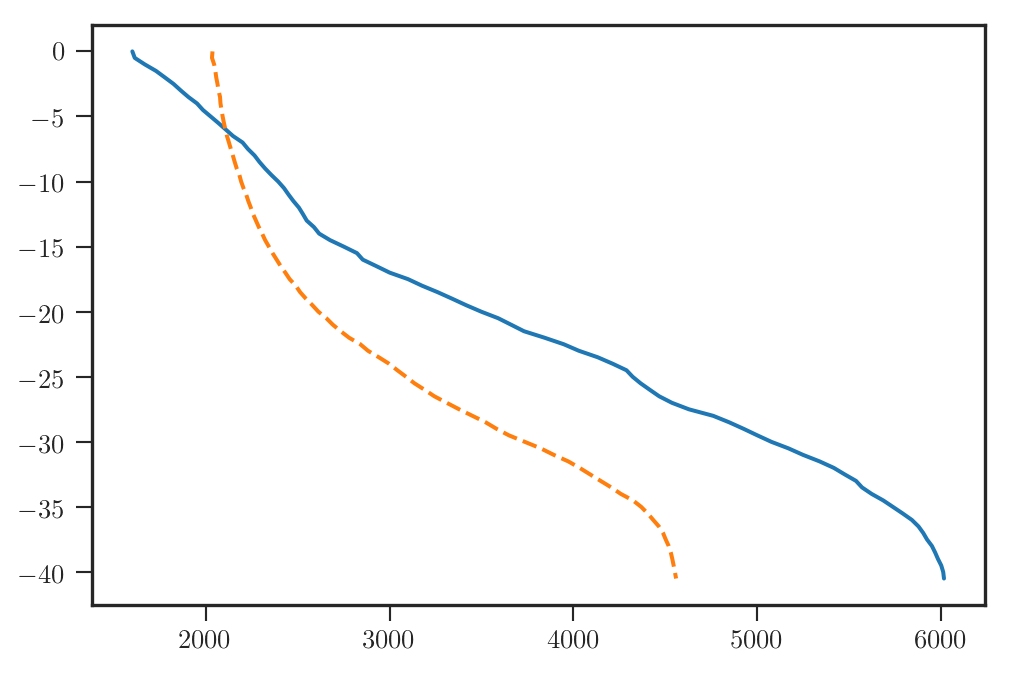

In [55]:
plt.plot(np.mean(np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['Fe3'][-365*20:,:]),axis=0), -z_lake)
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['MyLake_results']['basin1']['concentrations']['Fe3'][-365*20:,:]),axis=0), -z_lake, '--')

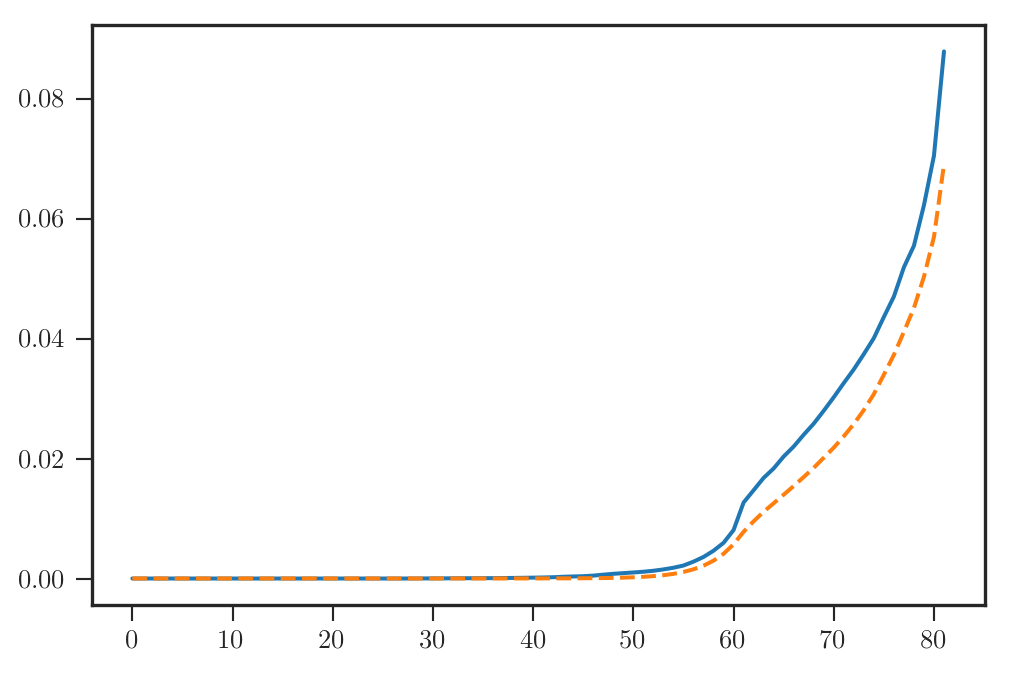

In [56]:
plt.plot(np.mean(np.array(hist_20y_plotter['MyLake_results']['basin1']['rates']['R13'][-365*20:,:]),axis=0))
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['MyLake_results']['basin1']['rates']['R13'][-365*20:,:]),axis=0), '--')

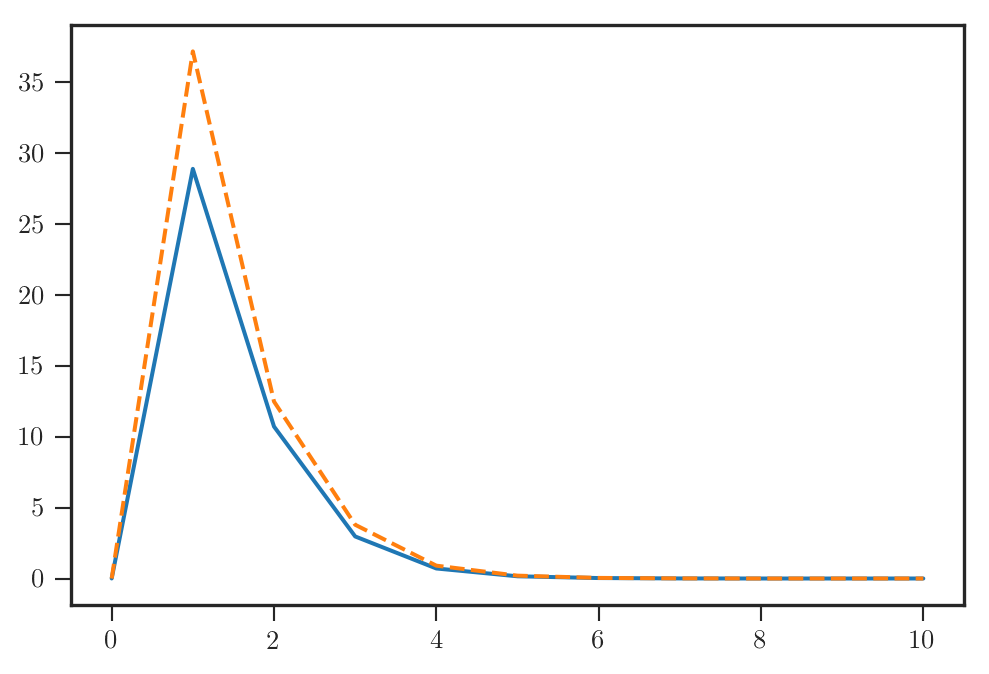

In [57]:
plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R13'][-365*20:,:11]*.92),axis=0))
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R13'][-365*20:,:11]*.92),axis=0), '--')

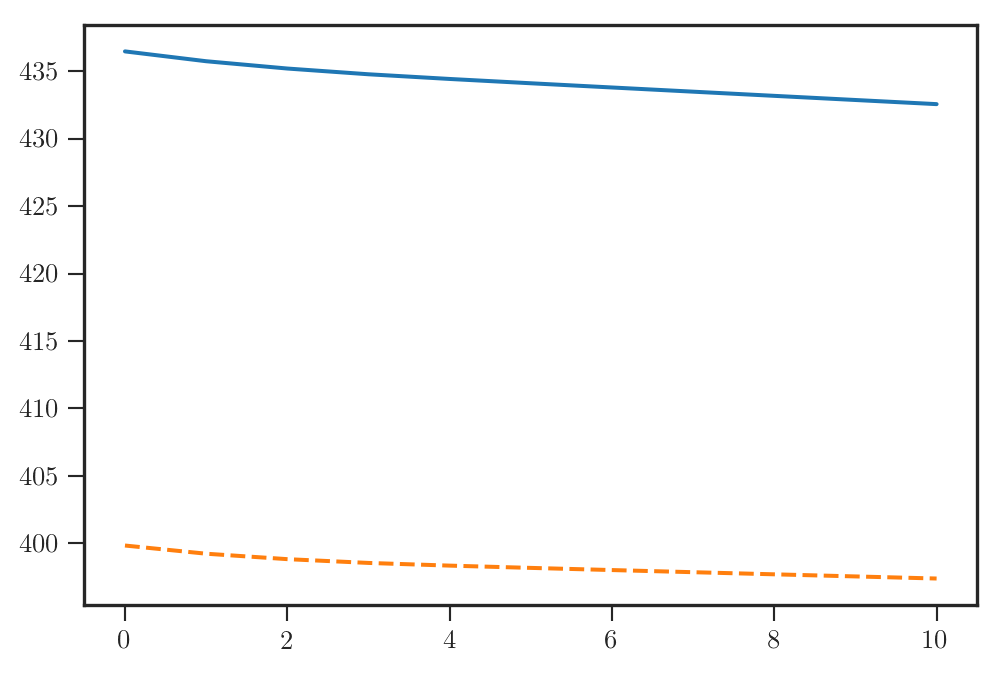

In [58]:
plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['concentrations']['POP'][-365*20:,:11]),axis=0))
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['concentrations']['POP'][-365*20:,:11]),axis=0), '--')



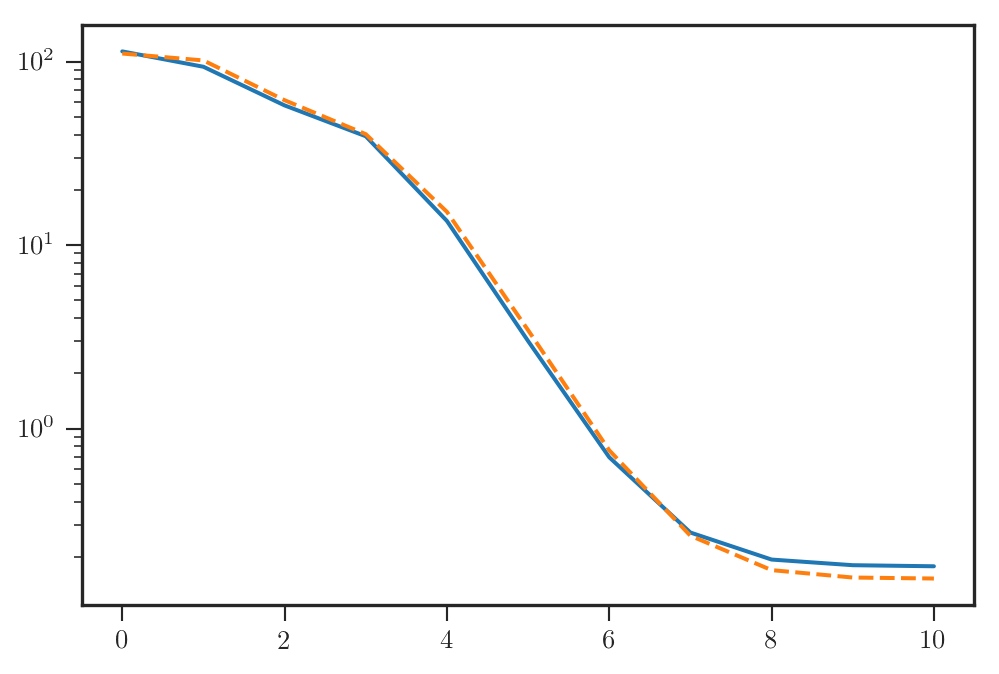

In [59]:
plt.semilogy(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['Ra'][-365*20:,:11]),axis=0))
plt.semilogy(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['Ra'][-365*20:,:11]),axis=0), '--')
# plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R2a'][-365*20:,:11]),axis=0))
# plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R2a'][-365*20:,:11]),axis=0), '--')
# plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:11]),axis=0))
# plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:11]),axis=0), '--')

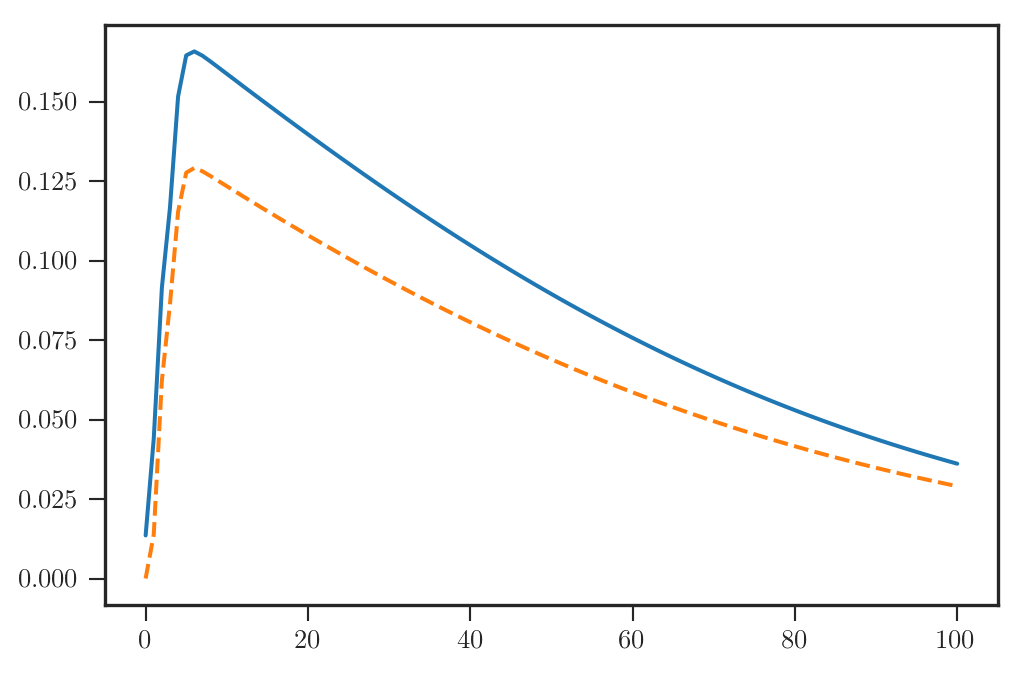

In [60]:
plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R3a'][-365*10:,:101]),axis=0))
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3a'][-365*10:,:101]),axis=0), '--')

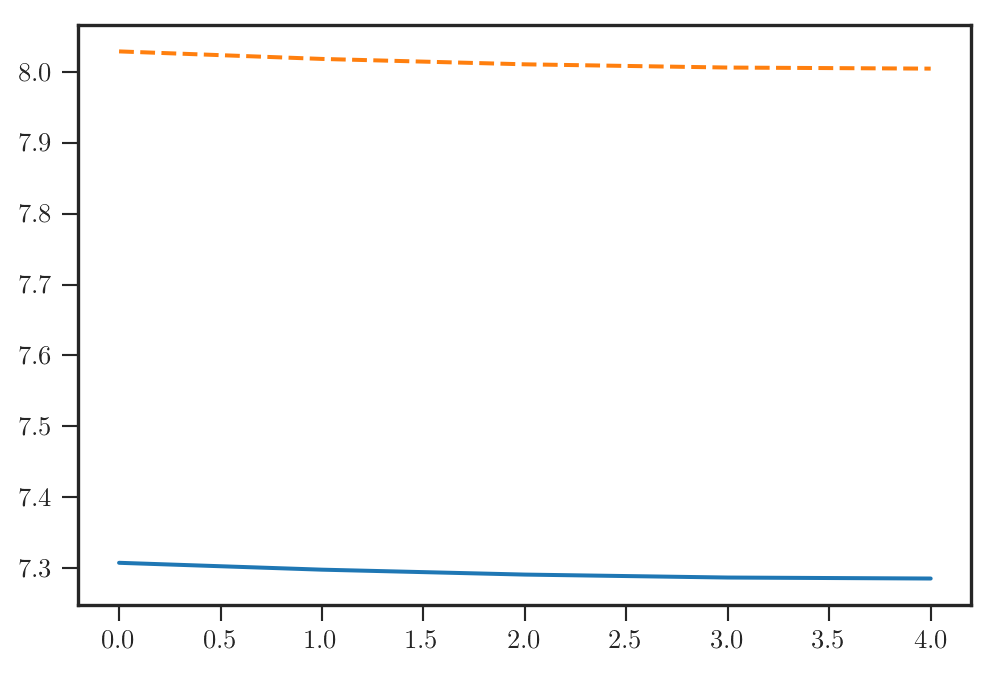

In [61]:
plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['concentrations']['PO4adsa'][-365*20:,-5:]),axis=0))
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['concentrations']['PO4adsa'][-365*20:,-5:]),axis=0), '--')

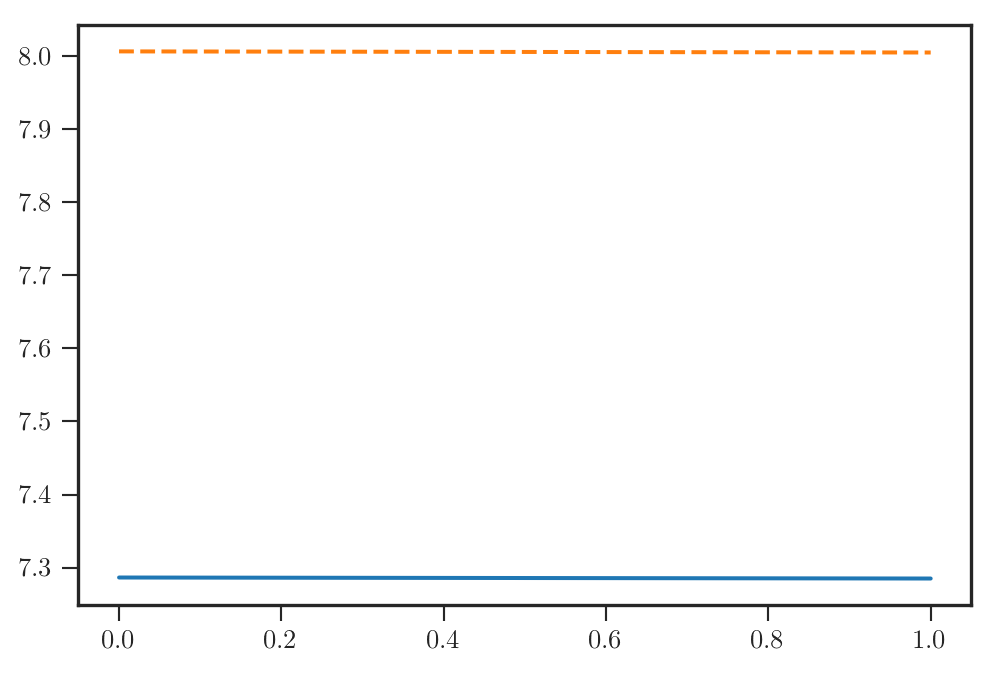

In [62]:
plt.plot(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['concentrations']['PO4adsa'][-365*20:,-2:]),axis=0))
plt.plot(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['concentrations']['PO4adsa'][-365*20:,-2:]),axis=0), '--')

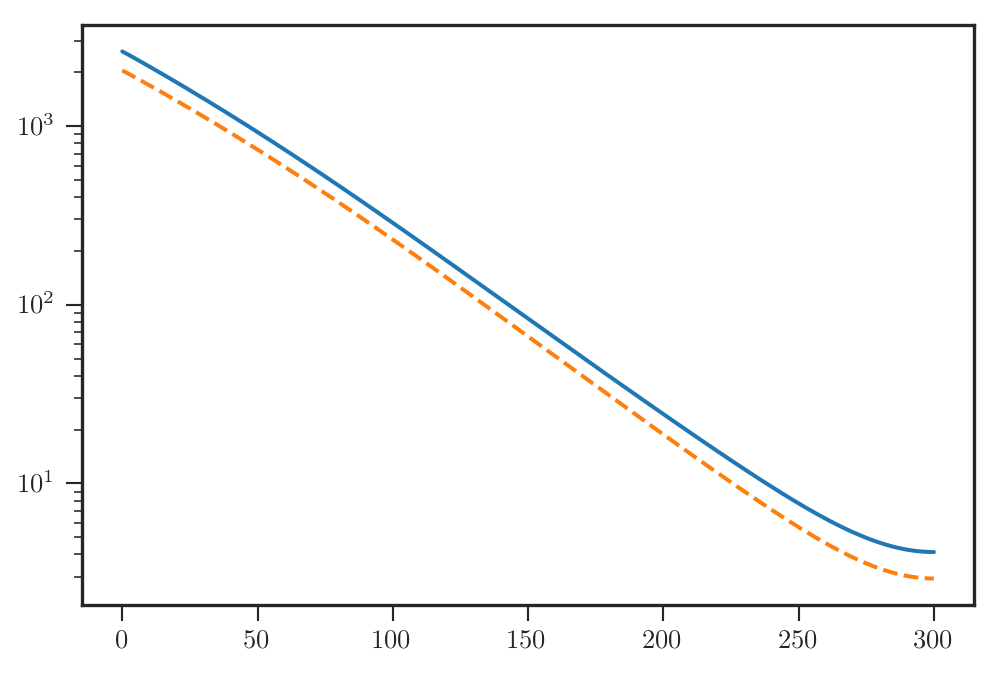

In [63]:
plt.semilogy(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,:]),axis=0))
plt.semilogy(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,:]),axis=0), '--')



In [64]:
z  = np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['z'])
z_wc  = 100*np.array(hist_20y_plotter_IceOFF['MyLake_results']['basin1']['z'])

In [65]:
Fs = (1-0.92)

In [66]:
Fw = 0.92

In [67]:
2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R33b'][-365*20:,:]),axis=0), z)

array([2.20941201])

In [68]:
2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R33b'][-365*20:,:]),axis=0), z)

array([2.40891306])

In [69]:
-Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R31a'][-365*20:,:]),axis=0), z)\
-Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R32a'][-365*20:,:]),axis=0), z)\
-2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R33a'][-365*20:,:]),axis=0), z)\
+2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R33b'][-365*20:,:]),axis=0), z)\
-2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R34a'][-365*20:,:]),axis=0), z)\
+2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R34b'][-365*20:,:]),axis=0), z)\
-Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R35a'][-365*20:,:]),axis=0), z)\
+Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['Ra'][-365*20:,:]),axis=0), z)\
+Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['Rf'][-365*20:,:]),axis=0), z)\
+Fw*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['Rc'][-365*20:,:]),axis=0), z)\
+200*4*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R3a_P'][-365*20:,:]),axis=0), z)\
+1*4*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R3b_P'][-365*20:,:]),axis=0), z)\
+116*4*Fs*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R3f_P'][-365*20:,:]),axis=0), z)\
+200*4*np.trapz(np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['rates']['R3c_P'][-365*20:,:]),axis=0), z)

array([7.83646635])

In [70]:
-Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R31a'][-365*20:,:]),axis=0), z)\
-Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R32a'][-365*20:,:]),axis=0), z)\
-2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R33a'][-365*20:,:]),axis=0), z)\
+2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R33b'][-365*20:,:]),axis=0), z)\
-2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R34a'][-365*20:,:]),axis=0), z)\
+2*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R34b'][-365*20:,:]),axis=0), z)\
-Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R35a'][-365*20:,:]),axis=0), z)\
+Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['Ra'][-365*20:,:]),axis=0), z)\
+Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['Rf'][-365*20:,:]),axis=0), z)\
+Fw*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['Rc'][-365*20:,:]),axis=0), z)\
+200*4*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3a_P'][-365*20:,:]),axis=0), z)\
+1*4*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3b_P'][-365*20:,:]),axis=0), z)\
+116*4*Fs*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3f_P'][-365*20:,:]),axis=0), z)\
+200*4*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3c_P'][-365*20:,:]),axis=0), z)

array([7.63056627])

In [71]:
F = (1-0.92)/0.92

In [97]:
start=5448 + 182
end=5448+90 + 182
start=-365*20
end=-1

In [128]:
def rates(results):
    return [-F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R31a'][start:end,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R32a'][start:end,:]),axis=0), z[0]), \
    -2*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33a'][start:end,:]),axis=0), z[0]), \
    +2*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33b'][start:end,:]),axis=0), z[0]), \
    -2*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R34a'][start:end,:]),axis=0), z[0]), \
    +2*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R34b'][start:end,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R35a'][start:end,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['Ra'][start:end,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['Rf'][start:end,:]),axis=0), z[0]), \
    +np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['Rc'][start:end,:]),axis=0), z[0]), \
    +200*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3a_P'][start:end,:]),axis=0), z[0]), \
    +1*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3b_P'][start:end,:]),axis=0), z[0]), \
    +116*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3f_P'][start:end,:]),axis=0), z[0]), \
    +200*4*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3c_P'][start:end,:]),axis=0), z[0]), \
    +200*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4a_P'][start:end,:]),axis=0), z[0]), \
    +1*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4b_P'][start:end,:]),axis=0), z[0]), \
    +116*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4f_P'][start:end,:]),axis=0), z[0]), \
    +200*4*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4c_P'][start:end,:]),axis=0), z[0])]


rate_names = [
    'R31a', 'R32a', 'R33a', 'R33b', 'R34a', 'R34b', 'R35a', 'Ra', 'Rf', 'Rc',
    'R3a_P', 'R3b_P', 'R3f_P', 'R3c_P', 'R4a_P', 'R4b_P', 'R4f_P', 'R4c_P'
]


In [129]:
np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['POP'][start:end,:]))


-2.438276119583494

In [130]:
Ice_rates = rates(hist_20y_plotter_IceOFF)
Reg_rates = rates(hist_20y_plotter)


In [131]:
for i,name in enumerate(rate_names):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i], Ice_rates[i]))

R31a: -33.727, -32.012
R32a: -0.000, -0.000
R33a: -0.058, -0.030
R33b: 2.401, 2.618
R34a: -7.086, -6.652
R34b: 0.164, 0.173
R35a: -0.003, -0.003
Ra: 2.405, 2.507
Rf: 0.034, 0.039
Rc: 0.000, 0.000
R3a_P: 11.966, 11.845
R3b_P: 25.804, 23.607
R3f_P: 0.096, 0.101
R3c_P: 0.000, 0.000
R4a_P: 0.000, 0.000
R4b_P: 0.000, 0.000
R4f_P: 0.000, 0.000
R4c_P: 0.000, 0.000


In [125]:
11.8+23.6

35.400000000000006

In [132]:
sum(Ice_rates)

2.193106037591354

In [133]:
sum(Reg_rates)

1.9954457658211995

In [122]:
def P_wc_rates(results):
    return [\
    np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['Re'][start:end,:]),axis=0), z_wc[0]), \
    np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['Rc'][start:end,:]),axis=0), z_wc[0]), \
    -np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['C'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Growth_bioz'][start:end,:])),axis=0), z_wc[0])+ \
    -np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['Chl'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Growth_bioz_2'][start:end,:])),axis=0), z_wc[0]), \
    np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['C'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Loss_bioz'][start:end,:])),axis=0), z_wc[0])+ \
    np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['Chl'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Loss_bioz_2'][start:end,:])),axis=0), z_wc[0]), \
    -np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R31a'][start:end,:]),axis=0), z_wc[0]), \
    -np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R32a'][start:end,:]),axis=0), z_wc[0]), \
    -2*np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R33a'][start:end,:]),axis=0), z_wc[0]), \
    -2*np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R34a'][start:end,:]),axis=0), z_wc[0]), \
    ]


rate_names = ['Re', 'Rc', 'Growth_bioz', 'Loss_bioz', 'R31a', 'R32a', 'R33a', 'R34a']




In [123]:
Ice_rates = P_wc_rates(hist_20y_plotter_IceOFF)
Reg_rates = P_wc_rates(hist_20y_plotter)

In [124]:
for i,name in enumerate(rate_names):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i], Ice_rates[i]))

Re: 0.785, 0.671
Rc: 0.458, 0.452
Growth_bioz: -3.259, -2.709
Loss_bioz: 6.844, 6.118
R31a: -0.399, -0.292
R32a: -0.000, -0.000
R33a: -0.000, -0.000
R34a: -0.000, -0.000


In [141]:
np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['O2'][start:end,:]))

-594.2664872248449

In [119]:
np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['POP'][start:end,:])) + np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'][start:end,:])) 

-2.470629154141338

In [109]:
np.mean(np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['P'][start:end,0]),axis=None)/30000



0.0004352153072895714

In [137]:
def boundary_P_fluxes(results):
    inflow_q = np.array(results['MyLake_results']['basin1']['Inflw'][0, start:end])
    surf_P = np.array(results['MyLake_results']['basin1']['concentrations']['P'][start:end,0])
    surf_POP = np.array(results['MyLake_results']['basin1']['concentrations']['POP'][start:end,0])
    surf_DOP = np.array(results['MyLake_results']['basin1']['concentrations']['DOP'][start:end,0])
    surf_PP = np.array(results['MyLake_results']['basin1']['concentrations']['PP'][start:end,0])
    surf_Phy = np.array(results['MyLake_results']['basin1']['concentrations']['C'][start:end,0]) + np.array(results['MyLake_results']['basin1']['concentrations']['Chl'][start:end,0])
    inflow_POP = 1.4*np.array(results['MyLake_results']['basin1']['Inflw'][22, start:end])
    inflow_TP = 1.6*np.array(results['MyLake_results']['basin1']['Inflw'][4, start:end])
    inflow_DOP = np.array(results['MyLake_results']['basin1']['Inflw'][5, start:end])
    area=2.38e+7

    res = {}
    res['P_outflow'] = np.mean(inflow_q * surf_P) / 31 * 1000 / area * 365 / 1e4
    res['POP_outflow'] = np.mean(inflow_q*surf_POP)/31*1000/area*365/1e4
    res['PP_outflow'] = np.mean(inflow_q*surf_PP)/31*1000/area*365/1e4
    res['DOP_outflow'] = np.mean(inflow_q * surf_DOP) / 31 * 1000 / area * 365 / 1e4
    res['Phy_outflow'] = np.mean(inflow_q * surf_Phy) / 31 * 1000 / area * 365 / 1e4
    res['POP_inflow'] = np.mean(inflow_q * inflow_POP) / 31 * 1000 / area * 365 / 1e4
    res['DOP_inflow'] = np.mean(inflow_q * inflow_DOP) / 31 * 1000 / area * 365 / 1e4
    res['TP_inflow'] = np.mean(inflow_q * inflow_TP) / 31 * 1000 / area * 365 / 1e4

    return res


In [140]:
boundary_P_fluxes(hist_20y_plotter_IceOFF)

{'DOP_inflow': 0.5286737018369514,
 'DOP_outflow': 0.22654774703271446,
 'POP_inflow': 1.9596109686593732,
 'POP_outflow': 0.34019619757818004,
 'PP_outflow': 0.05085994585470028,
 'P_outflow': 0.34438564121324183,
 'Phy_outflow': 0.04030990848385646,
 'TP_inflow': 2.7682290945905206}

In [120]:
sum(Reg_rates)

4.4295177658923555

In [121]:
sum(Ice_rates)

4.240290775569925

In [ ]:
Reg_rates

In [ ]:
Ice_rates

In [ ]:
def iron_rates(results):
    return [\
    -4*200*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:]),axis=0), z[0]), \
    -4*1*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3b'][-365*20:,:]),axis=0), z[0]), \
    -4*116*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3f'][-365*20:,:]),axis=0), z[0]), \
    -4*200/F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3c'][-365*20:,:]),axis=0), z[0]), \
    -4*1/F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3d'][-365*20:,:]),axis=0), z[0]), \
    -2*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R12'][-365*20:,:]),axis=0), z[0]), \
    1/F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R13'][-365*20:,:]),axis=0), z[0]), \
    -np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R31a'][-365*20:,:]),axis=0), z[0]), \
    - 0.1*np.mean(np.array(results['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,-1:])), \
    -0.92/(1-0.92)*np.mean(np.array(results['Sediment_results']['basin1']['sediment_transport_fluxes']['FeOH3'][-365*20:]))\
    ]

In [ ]:
names_iron = ['R3a', 'R3b', 'R3f', 'R3c', 'R3d', 'R12', 'R13', 'R31a','Burial','Deposit']

In [ ]:
Ice_rates = iron_rates(hist_20y_plotter_IceOFF)
Reg_rates = iron_rates(hist_20y_plotter)

In [83]:
sum(Ice_rates)

4.240290775569925

In [84]:
sum(Reg_rates)

4.4295177658923555

In [85]:
for i,name in enumerate(names_iron):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i]*(1-0.92), Ice_rates[i]*(1-0.92)))

NameError: name 'names_iron' is not defined

In [86]:
def iron_2_rates(results):
    return [\
    4*200*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:]),axis=0), z[0]), \
    4*1*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3b'][-365*20:,:]),axis=0), z[0]), \
    4*116*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3f'][-365*20:,:]),axis=0), z[0]), \
    4*200*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3c'][-365*20:,:]),axis=0), z[0]), \
    4*1*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3d'][-365*20:,:]),axis=0), z[0]), \
    2*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R12'][-365*20:,:]),axis=0), z[0]), \
    -np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R13'][-365*20:,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R27b'][-365*20:,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R29b'][-365*20:,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R27a'][-365*20:,:]),axis=0), z[0]), \
    -3*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33a'][-365*20:,:]),axis=0), z[0]), \
    +3*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33b'][-365*20:,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R29a'][-365*20:,:]),axis=0), z[0]), \
    ]

In [87]:
names_iron_2 = ['R3a', 'R3b', 'R3f', 'R3c', 'R3d', 'R12', 'R13', 'R27b', 'R2bb', 'R27a', 'R33a', 'R33b', 'R29a']

In [88]:
Ice_rates = iron_2_rates(hist_20y_plotter_IceOFF)
Reg_rates = iron_2_rates(hist_20y_plotter)

In [89]:
sum(Ice_rates)

175.559744141722

In [90]:
sum(Reg_rates)

232.5615800962914

In [91]:
for i,name in enumerate(names_iron_2):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i]*0.92, Ice_rates[i]*0.92))

R3a: 67.717, 54.573
R3b: 146.846, 108.400
R3f: 0.545, 0.473
R3c: 0.001, 0.001
R3d: 0.000, 0.000
R12: 0.012, 0.012
R13: -4.398, -5.515
R27b: 0.000, 0.000
R2bb: 0.000, 0.000
R27a: -0.000, -0.000
R33a: -0.080, -0.042
R33b: 3.314, 3.613
R29a: -0.000, -0.000


In [92]:
-4*200*np.trapz(np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:]),axis=0), z[0])

-682.1662914879677

In [ ]:
sum(Ice_rates)

In [ ]:
sum(Reg_rates)

In [ ]:
0.1*np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,-1:]))

In [ ]:
0.1*np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,-1:]))

In [ ]:
-np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['sediment_transport_fluxes']['FeOH3'][-365*20:]))

In [ ]:
-np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['FeOH3'][-365*20:]))

In [ ]:
plt.plot(z[0], np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['rates']['Ra'][-365*20:,:]),axis=0))

In [142]:
RCP8_IPSL_plotter.close()
RCP4_IPSL_plotter.close()
RCP8_GFDL_plotter.close()
RCP4_GFDL_plotter.close()
RCP8_NorESM_plotter.close()
RCP4_NorESM_plotter.close()
hist_20y_plotter.close()
str(datetime.now())

'2018-03-09 14:13:52.217070'

In [143]:
RCP8_IPSL_plotter_IceOFF.close()
RCP4_IPSL_plotter_IceOFF.close()
RCP8_GFDL_plotter_IceOFF.close()
RCP4_GFDL_plotter_IceOFF.close()
RCP8_NorESM_plotter_IceOFF.close()
RCP4_NorESM_plotter_IceOFF.close()
hist_20y_plotter_IceOFF.close()
str(datetime.now())

'2018-03-09 14:13:53.089407'

In [144]:
RCP8_IPSL_plotter_Q10OFF.close()
RCP4_IPSL_plotter_Q10OFF.close()
RCP8_GFDL_plotter_Q10OFF.close()
RCP4_GFDL_plotter_Q10OFF.close()
RCP8_NorESM_plotter_Q10OFF.close()
RCP4_NorESM_plotter_Q10OFF.close()
hist_20y_plotter_Q10OFF.close()
str(datetime.now())

NameError: name 'RCP8_IPSL_plotter_Q10OFF' is not defined

In [ ]:
0.78*(1-0.92)